#  _LAB3  :  Caravan Insurance Policy_ <br><br><br>

### Business objective:
- __Identify clients who would be interested in a caravan insurance policy. __

### Data science goals :
- __Predict clients response to  a caravan insurance policy.__
- __Extract the typical profile of interested clients.__
- __Formulate a scoring method ,with a significant ranking threshold, in order to maximize customers positive response when targeting only a small fraction of the clients. __

### Data phase : 
- <a href='dataviz.html'>Data Comprehension</a>
- <a href='acp.html'>PCA</a> 


### Import and prepare the data:

In [7]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
%matplotlib inline

import datetime
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.model_selection import GridSearchCV

import sklearn
from sklearn_pandas import DataFrameMapper

data=pd.read_table("C:/Users/Sedki/Desktop/ML/lab3/Lab Police d'Assurance sur Caravane/AssurancExpertsInc.txt")


In [8]:
data['CLASS'] =data['CLASS'].map({'Yes':1, 'No':0})

In [9]:
train=data.drop(['STATUS'],1)

In [138]:
Train=data.loc[data['STATUS'] == 'Learning']
yesTrain=Train.loc[data['CLASS'] == 1]
noTrain=Train.loc[data['CLASS'] == 0]
Test=data.loc[data['STATUS'] == 'Test']
noTest=Test.loc[data['CLASS'] == 0]
yesTest=Test.loc[data['CLASS'] == 1]


print("no",len(noTrain))
print("yes",len(yesTrain))
print('Proportion:', round(len(noTrain) / len(yesTrain)))

no 5474
yes 348
Proportion: 16


In [56]:
train.columns

Index(['SD1', 'SD2', 'SD3', 'SD4', 'SD5', 'SD6', 'SD7', 'SD8', 'SD9', 'SD10',
       'SD11', 'SD12', 'SD13', 'SD14', 'SD15', 'SD16', 'SD17', 'SD18', 'SD19',
       'SD20', 'SD21', 'SD22', 'SD23', 'SD24', 'SD25', 'SD26', 'SD27', 'SD28',
       'SD29', 'SD30', 'SD31', 'SD32', 'SD33', 'SD34', 'SD35', 'SD36', 'SD37',
       'SD38', 'SD39', 'SD40', 'SD41', 'SD42', 'SD43', 'PO44', 'PO45', 'PO46',
       'PO47', 'PO48', 'PO49', 'PO50', 'PO51', 'PO52', 'PO53', 'PO54', 'PO55',
       'PO56', 'PO57', 'PO58', 'PO59', 'PO60', 'PO61', 'PO62', 'PO63', 'PO64',
       'PO65', 'PO66', 'PO67', 'PO68', 'PO69', 'PO70', 'PO71', 'PO72', 'PO73',
       'PO74', 'PO75', 'PO76', 'PO77', 'PO78', 'PO79', 'PO80', 'PO81', 'PO82',
       'PO83', 'PO84', 'PO85', 'CLASS'],
      dtype='object')

### PCA :

In [350]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
test=data.iloc[:,0:85]
# Separating out the target
y_target= data.loc[:,['CLASS']].values
pca.fit(test)

pca_samples = pca.transform(test)

In [351]:
ps = pd.DataFrame(pca_samples)
ps.head()

,0,1,2,3,4,5
0,-9.265887,-4.923825,-5.150031,1.546526,-3.120264,-0.144359
1,-12.140570,-4.827186,1.391948,-1.980844,2.701034,2.650322
2,-13.301413,4.752158,2.332582,3.728209,0.181392,7.408002
3,15.690826,2.192754,-0.982498,3.615461,0.404746,1.171866
4,-13.916155,-8.392210,8.867959,0.416685,5.214891,-3.777456


(9822, 2)
          3          0
0  1.546526  -9.265887
1 -1.980844 -12.140570
2  3.728209 -13.301413
3  3.615461  15.690826
4  0.416685 -13.916155


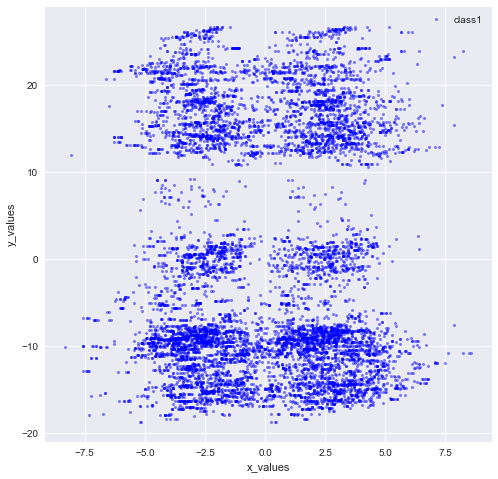

In [352]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
tocluster = pd.DataFrame(ps[[3,0]])
tocluster.head()
print (tocluster.shape)
print (tocluster.head())

fig = plt.figure(figsize=(8,8))
plt.plot(tocluster[3], tocluster[0], 'o', markersize=3, color='blue', alpha=0.5, label='class1')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.show()

On a projeté plusieurs paires afin de chercher celui qui convient à un cluster de KMeans. On a choisi la paire (PC3, PC0). Puisque chaque composant est la projection de tous les points de l'ensemble de données original donc chaque composant est représentatif de l'ensemble de données.

In [353]:
finalDf = pd.concat([tocluster, data[['CLASS']]], axis = 1)
finalDf.head()

,3,0,CLASS
0,1.546526,-9.265887,0
1,-1.980844,-12.140570,0
2,3.728209,-13.301413,0
3,3.615461,15.690826,0
4,0.416685,-13.916155,0


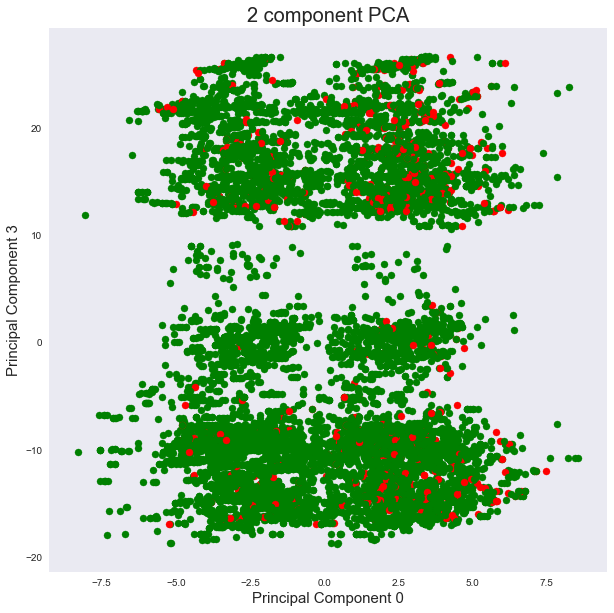

In [355]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 0', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for i in range(0,len(finalDf)):
    if (finalDf.loc[i,'CLASS']==0):
        ax.scatter(finalDf.loc[i,3] , finalDf.loc[i,0], c = 'g', s = 50)
    if (finalDf.loc[i,'CLASS']==1):
        ax.scatter(finalDf.loc[i,3] , finalDf.loc[i,0], c = 'r', s = 50)
#ax.legend(targets) 
ax.grid()

Par cette projection on remarque des groupements des individus et chaque groupe represente un ensemble de caracteristiques communes, et par l'habillage selon la colonne 'CLASS' on remarque la superposition de deux reponses , alors on peut constater que les gens qui ont repondu 'Yes' sur le questionnaire (qui sont interessés par l'assurance caravane ) n'ont pas obligatoirement un profil qui repond reellement à l'assurance caravane et inversement pour les gens qui ont repondu 'No'.

On passe pour la segmentation pour caracteriser chaque groupe .

## Clustering:

In [356]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

clusterer = KMeans(n_clusters=3,random_state=42).fit(tocluster)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(tocluster)
print(centers)

[[ -0.38766911  -0.36347482]
 [  0.11219954  17.69258746]
 [  0.03867688 -11.49707999]]


In [357]:
print (c_preds[0:100])

[2 2 2 1 2 0 2 2 2 1 1 1 2 2 0 2 2 0 1 2 2 2 1 2 1 2 2 2 2 2 0 0 2 2 1 1 1
 2 2 2 0 1 1 2 1 2 2 2 2 2 2 0 0 1 2 2 1 1 2 0 2 2 2 0 1 2 2 1 2 2 1 0 2 1
 1 1 2 1 1 1 1 1 1 2 0 2 1 2 2 2 1 1 1 0 2 1 2 1 2 0]


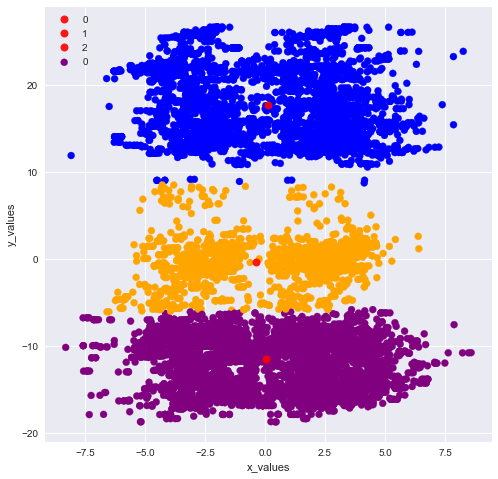

In [358]:
import matplotlib
fig = plt.figure(figsize=(8,8))
colors = ['orange','blue','purple','green']
colored = [colors[k] for k in c_preds]
#print (colored[0:10])
plt.scatter(tocluster[3],tocluster[0],  color = colored)
for ci,c in enumerate(centers):
    plt.plot(c[0], c[1], 'o', markersize=8, color='red', alpha=0.9, label=''+str(ci))

plt.xlabel('x_values')
plt.ylabel('y_values')
#plt.xlabel('y_values')
#plt.ylabel('x_values')
plt.legend()
plt.show()

In [359]:
clust_prod = test.copy()
clust_prod['cluster'] = c_preds

clust_prod.head()

,SD1,SD2,SD3,SD4,SD5,SD6,SD7,SD8,SD9,SD10,...,PO77,PO78,PO79,PO80,PO81,PO82,PO83,PO84,PO85,cluster
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,2
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,2
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,2
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,1
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,2


In [360]:
df1=clust_prod [ clust_prod.cluster == 0 ]
print(len(df1))
df1.head()

1462


,SD1,SD2,SD3,SD4,SD5,SD6,SD7,SD8,SD9,SD10,...,PO77,PO78,PO79,PO80,PO81,PO82,PO83,PO84,PO85,cluster
5,23,1,2,1,5,0,5,0,5,0,...,0,0,0,0,0,0,0,0,0,0
14,23,1,1,2,5,0,6,1,2,1,...,0,0,0,1,0,0,0,0,0,0
17,22,2,3,3,5,0,5,0,4,7,...,0,0,0,1,0,0,0,0,0,0
30,24,2,2,2,5,1,3,2,4,2,...,0,0,0,1,0,0,0,0,0,0
31,23,1,2,2,5,2,4,2,4,7,...,0,0,0,0,0,0,0,0,0,0


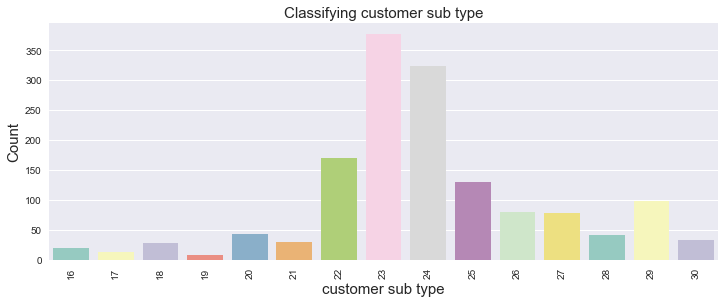

In [361]:
plt.figure(figsize=(12,20))
plt.subplot(413)
sns.countplot(x=df1.SD1,data=df1, palette='Set3')
plt.ylabel('Count', fontsize=15)
plt.xlabel('customer sub type', fontsize=15)
plt.xticks(rotation='vertical')
plt.title("Classifying customer sub type", fontsize=15)
plt.show()

(Students in apartments,Fresh masters in the city,Single youth,Suburban youth,Etnically diverse,Young urban have-nots,Mixed apartment dwellers,Young and rising,Young and low educated,Young seniors in the city,Own home elderly,Seniors in apartments,Residential elderly,Porchless seniors: no front yard,Religious elderly singles)

la plus part des individus sont de type 22 ,23 et 24 .Donc ce cluster se caracterise par des customers qui sont jeunes aussi par les gens qui vivrent seule.

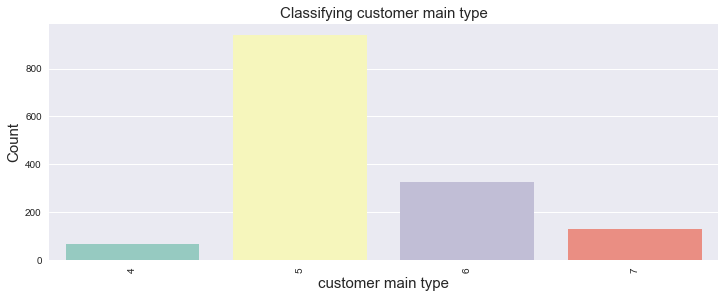

In [362]:
plt.figure(figsize=(12,20))
plt.subplot(413)
sns.countplot(x=df1.SD5,data=df1, palette='Set3')
plt.ylabel('Count', fontsize=15)
plt.xlabel('customer main type', fontsize=15)
plt.xticks(rotation='vertical')
plt.title("Classifying customer main type", fontsize=15)
plt.show()

(Career Loners,Living well,Cruising Seniors,Retired and Religeous)

ce cluster represente les gens qui vivent bien,les gens qui sont interessés par les croisières aussi les personnes retraités.

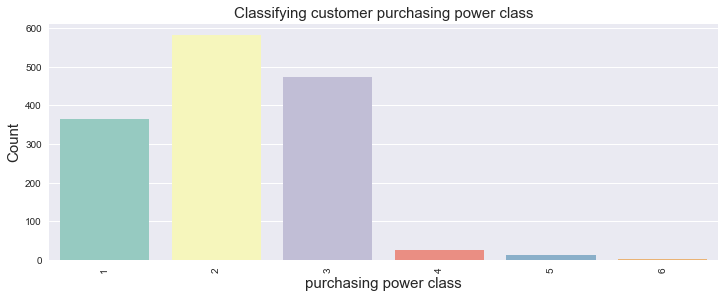

In [363]:
plt.figure(figsize=(12,20))
plt.subplot(413)
sns.countplot(x=df1.SD43,data=df1, palette='Set3')
plt.ylabel('Count', fontsize=15)
plt.xlabel('purchasing power class', fontsize=15)
plt.xticks(rotation='vertical')
plt.title("Classifying customer purchasing power class", fontsize=15)
plt.show()


In [364]:
df2=clust_prod [ clust_prod.cluster == 1 ]
print(len(df2))
df2.head()

3311


,SD1,SD2,SD3,SD4,SD5,SD6,SD7,SD8,SD9,SD10,...,PO77,PO78,PO79,PO80,PO81,PO82,PO83,PO84,PO85,cluster
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,1
9,11,2,3,3,3,3,5,0,2,7,...,0,0,0,1,0,0,0,0,0,1
10,10,1,4,3,3,1,4,1,4,7,...,0,0,0,0,0,0,0,0,0,1
11,9,1,3,3,3,1,3,2,4,7,...,0,0,0,1,0,0,0,0,0,1
18,13,1,4,2,3,2,4,0,3,7,...,0,0,0,1,0,0,0,0,0,1


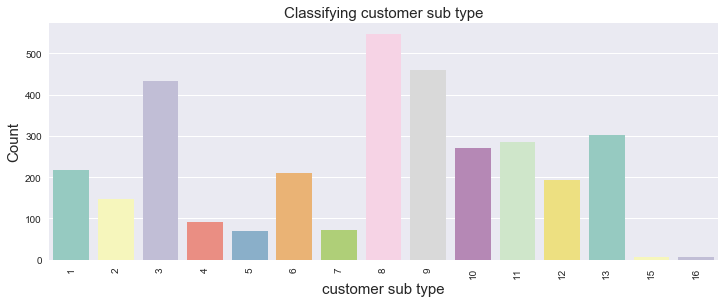

In [365]:
plt.figure(figsize=(12,20))
plt.subplot(413)
sns.countplot(x=df2.SD1,data=df2, palette='Set3')
plt.ylabel('Count', fontsize=15)
plt.xlabel('customer sub type', fontsize=15)
plt.xticks(rotation='vertical')
plt.title("Classifying customer sub type", fontsize=15)
plt.show()

(High Income, expensive child and Very Important Provincials,High status seniors,Affluent senior apartments,Mixed seniors,Career and childcare,Dinki's (double income no kids),Middle class families,Modern and complete families,Stable family,Family starters ,Affluent young families,Young all american family,Junior cosmopolitan,Senior cosmopolitans,Students in apartments)

ce cluster se caracterise par les familles qui sont stable, de classe moyenne,moderne aussi les nouveaux couples ...

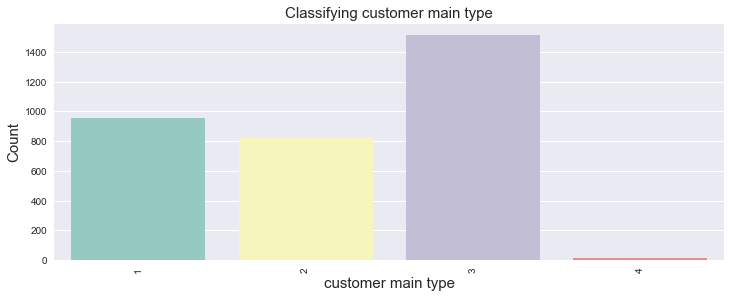

In [366]:
plt.figure(figsize=(12,20))
plt.subplot(413)
sns.countplot(x=df2.SD5,data=df2, palette='Set3')
plt.ylabel('Count', fontsize=15)
plt.xlabel('customer main type', fontsize=15)
plt.xticks(rotation='vertical')
plt.title("Classifying customer main type", fontsize=15)
plt.show()

(Successful hedonists,Driven Growers,Average Family,Career Loners(negligable))

ce cluster contient les familles moyennes , les personnes hedonistes et les gens qui sont motivés par l'agriculture.

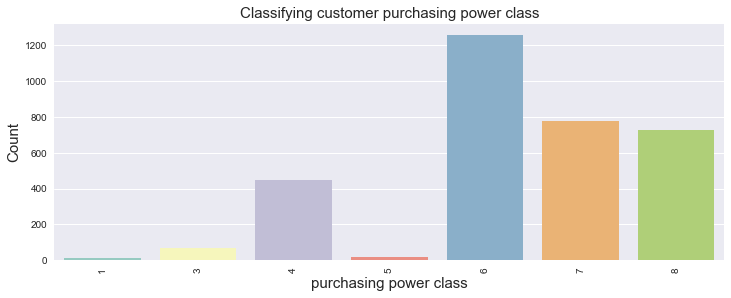

In [367]:
plt.figure(figsize=(12,20))
plt.subplot(413)
sns.countplot(x=df2.SD43,data=df2, palette='Set3')
plt.ylabel('Count', fontsize=15)
plt.xlabel('purchasing power class', fontsize=15)
plt.xticks(rotation='vertical')
plt.title("Classifying customer purchasing power class", fontsize=15)
plt.show()

In [368]:
df3=clust_prod [ clust_prod.cluster == 2 ]
print(len(df3))
df3.head()

5049


,SD1,SD2,SD3,SD4,SD5,SD6,SD7,SD8,SD9,SD10,...,PO77,PO78,PO79,PO80,PO81,PO82,PO83,PO84,PO85,cluster
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,2
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,2
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,2
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,2
6,39,2,3,2,9,2,2,0,5,7,...,0,0,0,0,0,0,0,0,0,2


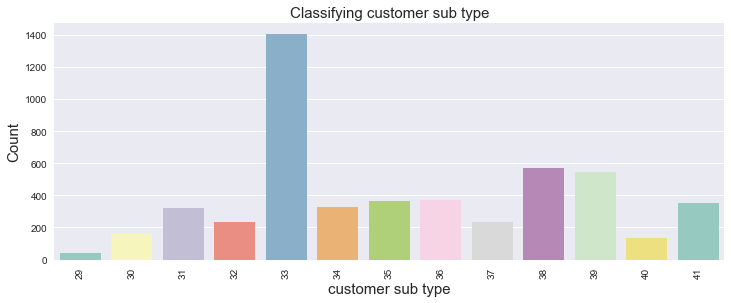

In [369]:
plt.figure(figsize=(12,20))
plt.subplot(413)
sns.countplot(x=df3.SD1,data=df3, palette='Set3')
plt.ylabel('Count', fontsize=15)
plt.xlabel('customer sub type', fontsize=15)
plt.xticks(rotation='vertical')
plt.title("Classifying customer sub type", fontsize=15)
plt.show()

(Porchless seniors: no front yard,Religious elderly singles,Low income catholics,Mixed seniors,Lower class large families,Large family and employed child,Village families,Couples with teens 'Married with children',Mixed small town dwellers,Traditional families,Large religous families,Large family farms,Mixed rurals)

ce cluster se caracterise par les nombreuses familles avec classe base aussi les familles traditionnelles

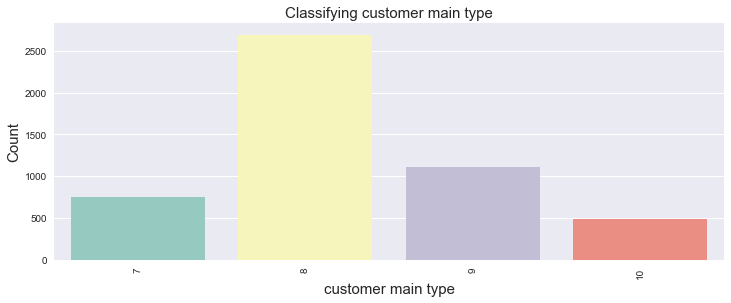

In [370]:
plt.figure(figsize=(12,20))
plt.subplot(413)
sns.countplot(x=df3.SD5,data=df3, palette='Set3')
plt.ylabel('Count', fontsize=15)
plt.xlabel('customer main type', fontsize=15)
plt.xticks(rotation='vertical')
plt.title("Classifying customer main type", fontsize=15)
plt.show()

( Retired and Religeous,Family with grown ups,Conservative families,Farmers)

ce cluster contient les familles larges et conservatives , les retraités aussi les agriculteurs.

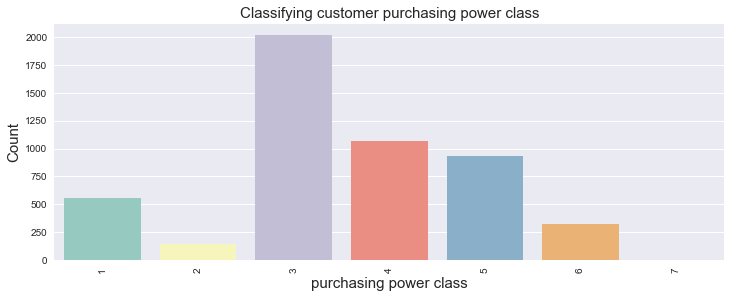

In [371]:
plt.figure(figsize=(12,20))
plt.subplot(413)
sns.countplot(x=df3.SD43,data=df3, palette='Set3')
plt.ylabel('Count', fontsize=15)
plt.xlabel('purchasing power class', fontsize=15)
plt.xticks(rotation='vertical')
plt.title("Classifying customer purchasing power class", fontsize=15)
plt.show()

## CLASSIFICATION:

__To get good results with this dataset we have to deal with 2 big challenges:__
- __The high number of variables : 84. __
- __The huge disparity between classes : the yes class is 16 times smaller than the no class. __

__In order to solve the first issue we tried several techniques of features selection in order to reduce the complexity of the models,reduce the noise and optimize the performence. __ <br> <br>
__To deal with the second problem of the great disparity between classes:__
- __We fixed the evaluation metric as the auc_score since we are mostly interested in identifying clients that belongs to a specefic class(the smaller class). __<br>
- __We used 2 resampling methods:SMOTE+TOMEK and Random under_sampling to reduce the disparity between classes.__

In [48]:
print("no",len(noTest))
print("yes",len(yesTest))
print('Proportion:', round(len(noTest) / len(yesTest)))

no 3762
yes 238
Proportion: 16


In [10]:
X_train ,X_test , Y_train , Y_test =train_test_split(train.drop(['CLASS'],1),train['CLASS'],test_size=0.25)
print(Y_train.mean())

0.0572902525115


### Smote + Tomek links:

In [11]:
from imblearn.combine import SMOTETomek

sm = SMOTETomek()
X_Train, Y_Train = sm.fit_sample(X_train, Y_train)
print(len(Y_Train))
print(Y_Train.mean())

13884
0.5


__In the following part,we tried several classification algorithms with and withou feature selection and then we compared them using the ROC curve in order to identify the best candidate.__

             precision    recall  f1-score   support

          0       0.72      0.96      0.83      1726
          1       0.60      0.14      0.22       730

avg / total       0.69      0.72      0.65      2456



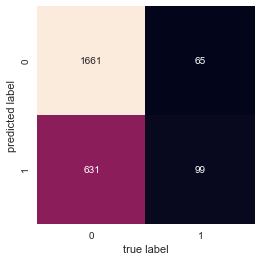

In [13]:
log_r = LogisticRegression()
log_r.fit(X_Train, Y_Train)
log_r.score(X_test, Y_test)
predictions=log_r.predict(X_test)
print(metrics.classification_report(predictions, Y_test))
mat = confusion_matrix(Y_test, predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

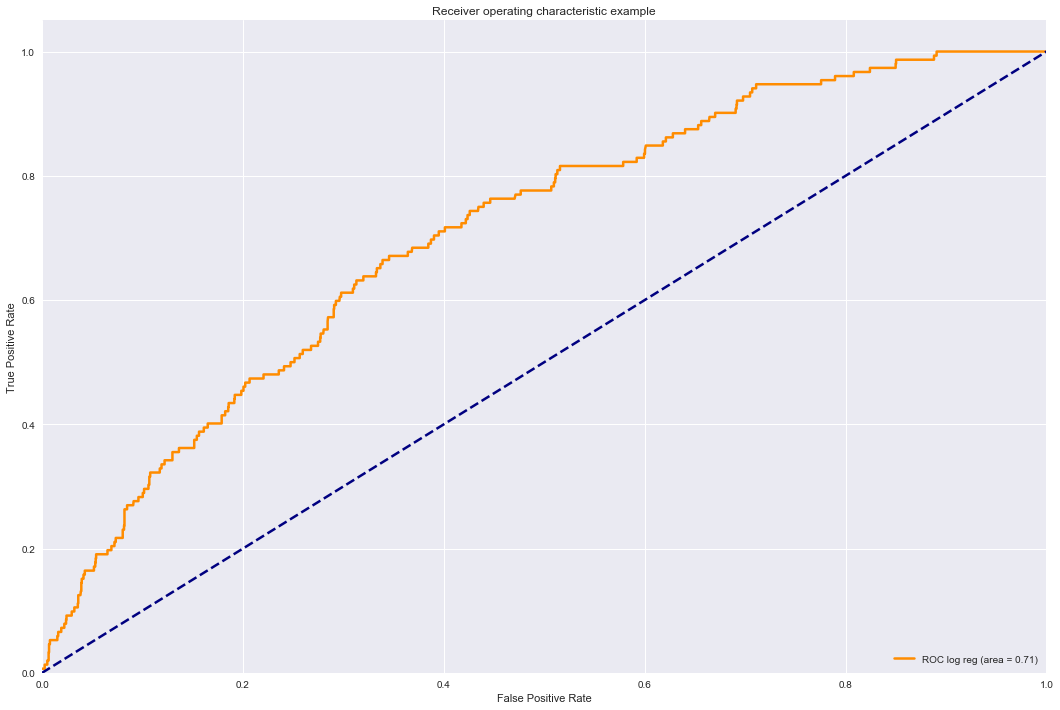

In [108]:
fprR, tprR, thresholdsR = metrics.roc_curve(Y_test, log_r.predict_proba(X_test)[:,1])
plt.figure(figsize=(18,12))
lw = 2.5
plt.plot(fprR, tprR, color='darkorange',
         lw=lw, label='ROC log reg (area = %0.2f)' % auc(fprR, tprR))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [130]:
X_train=X_Train.loc[:,'SD1':'PO64'] 
X_test=X_test.loc[:,'SD1':'PO64'] 

### __Recursive feature elimination__:
 __It selects the features by recursively considering smaller and smaller sets of features. For the linear model, it is based on the value of the coefficients (the lowest one in absolute value is removed). The process continues until we reach the desired number of features.__<br><br>
__Goal: __
__Detecting the subset of relevant features for an enhanced generalization performance__ .<br><br>


In [109]:
from sklearn.feature_selection import RFE 
log_lm = LogisticRegression()
selecteur = RFE(estimator=log_lm)
#launch the selection process 
sol = selecteur.fit(X_train,Y_train)
#number of selected attributes 
print(sol.n_features_) 
#list of selected features 
print(sol.support_) 
# order of deletion 
print(sol.ranking_) 

42
[False False False False False False False False False  True False False
 False False False False False False False False  True False False False
 False False False False False  True  True  True  True  True  True  True
 False False False False False False False  True  True  True  True False
  True  True False False  True False  True  True  True  True  True  True
  True False  True False  True  True False  True  True  True False False
  True  True  True  True  True  True  True  True  True  True  True  True
  True]
[29 21 22 33 28 16 41 17 37  1  3  2  6  7  8 18 44 34 26 11  1 24 27 25 40
 39 32 43 35  1  1  1  1  1  1  1 31 30 36 42 12 15 13  1  1  1  1 20  1  1
  5 14  1 38  1  1  1  1  1  1  1 19  1 10  1  1  9  1  1  1 23  4  1  1  1
  1  1  1  1  1  1  1  1  1  1]


(1893, 42)
(2456, 42)
0.888843648208
             precision    recall  f1-score   support

          0       0.93      0.95      0.94      2254
          1       0.26      0.19      0.22       202

avg / total       0.87      0.89      0.88      2456



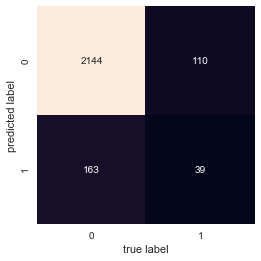

In [202]:
# matrix for the selected attributes -training set
# we use the boolean vector sol.support_ 
#.iloc[:,4].values
log_lm = LogisticRegression()

X_new_app = X_Train[:,sol.support_]
X_new_test = X_test.iloc[:,sol.support_]

print(X_new_app.shape) # (468, 4)  4 variables restantes
# fit the model on the selected attributes
modele_sel = log_lm.fit(X_new_app, Y_Train)
# matrix for the selected attributes – test set 
X_new_test = X_test.iloc[:,sol.support_].values
print(X_new_test.shape) # (300, 4)
# prediction on the test set 
y_pred_sel = modele_sel.predict(X_new_test)
# success rate 
print(metrics.accuracy_score(Y_test,y_pred_sel)) # 0.787

print(metrics.classification_report(y_pred_sel, Y_test))
mat = confusion_matrix(Y_test, y_pred_sel)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

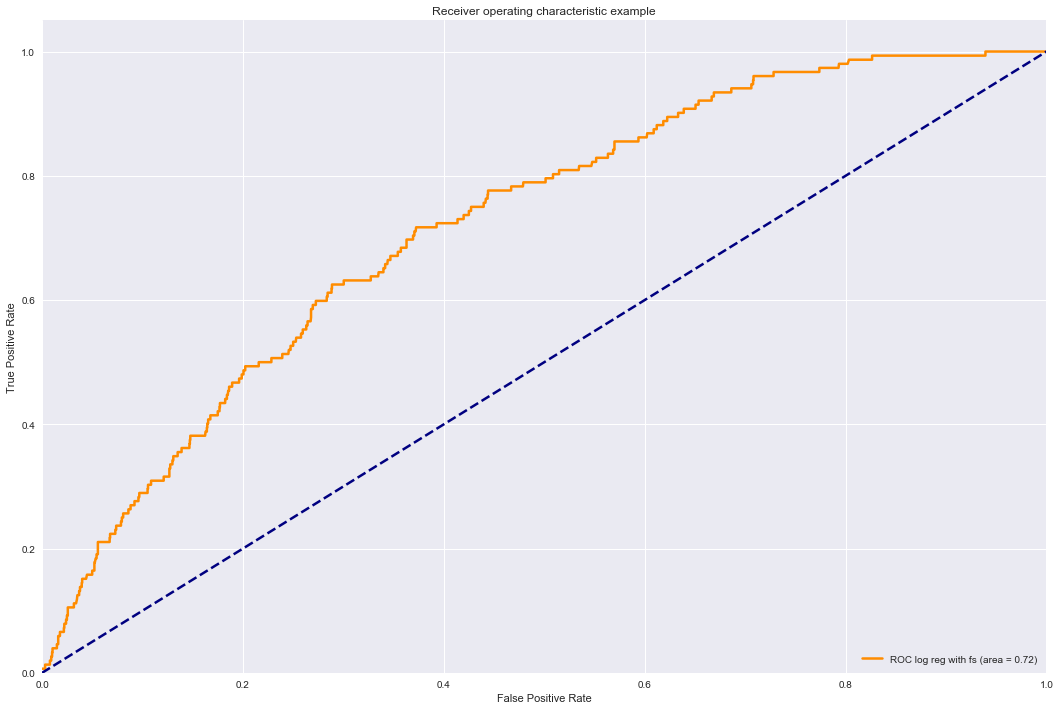

In [111]:
fprlR, tprlR, thresholdslR = metrics.roc_curve(Y_test, log_lm.predict_proba(X_new_test)[:,1])
plt.figure(figsize=(18,12))
lw = 2.5
plt.plot(fprlR, tprlR, color='darkorange',
         lw=lw, label='ROC log reg with fs (area = %0.2f)' % auc(fprlR, tprlR))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

             precision    recall  f1-score   support

          0       0.98      0.94      0.96      2392
          1       0.11      0.25      0.15        64

avg / total       0.96      0.93      0.94      2456



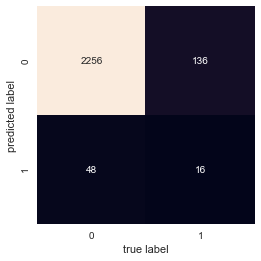

In [112]:
grd1 = GradientBoostingClassifier()
grd1.fit(X_Train,Y_Train)
grd1.score(X_test, Y_test)

predictions=grd1.predict(X_test)
print(metrics.classification_report(predictions, Y_test))
mat = confusion_matrix(Y_test, predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

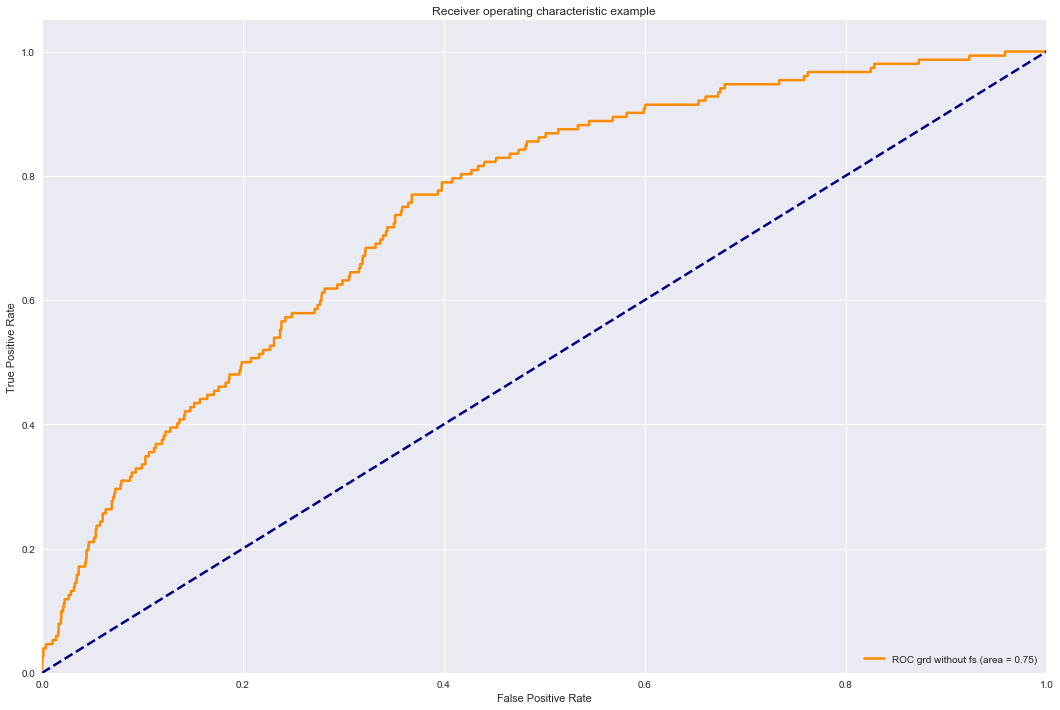

In [113]:
fprgrd1, tprgrd1, thresholdsgrd1 = metrics.roc_curve(Y_test, grd1.predict_proba(X_test)[:,1])
plt.figure(figsize=(18,12))
lw = 2.5
plt.plot(fprgrd1, tprgrd1, color='darkorange',
         lw=lw, label='ROC grd without fs (area = %0.2f)' % auc(fprgrd1, tprgrd1))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

             precision    recall  f1-score   support

          0       0.95      0.95      0.95      2324
          1       0.16      0.19      0.18       132

avg / total       0.91      0.90      0.91      2456



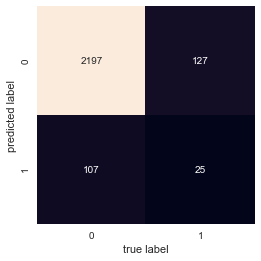

In [114]:
grd = GradientBoostingClassifier()
grd.fit(X_new_app,Y_Train)
grd.score(X_new_test, Y_test)

predictions=grd.predict(X_new_test)
print(metrics.classification_report(predictions, Y_test))
mat = confusion_matrix(Y_test, predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

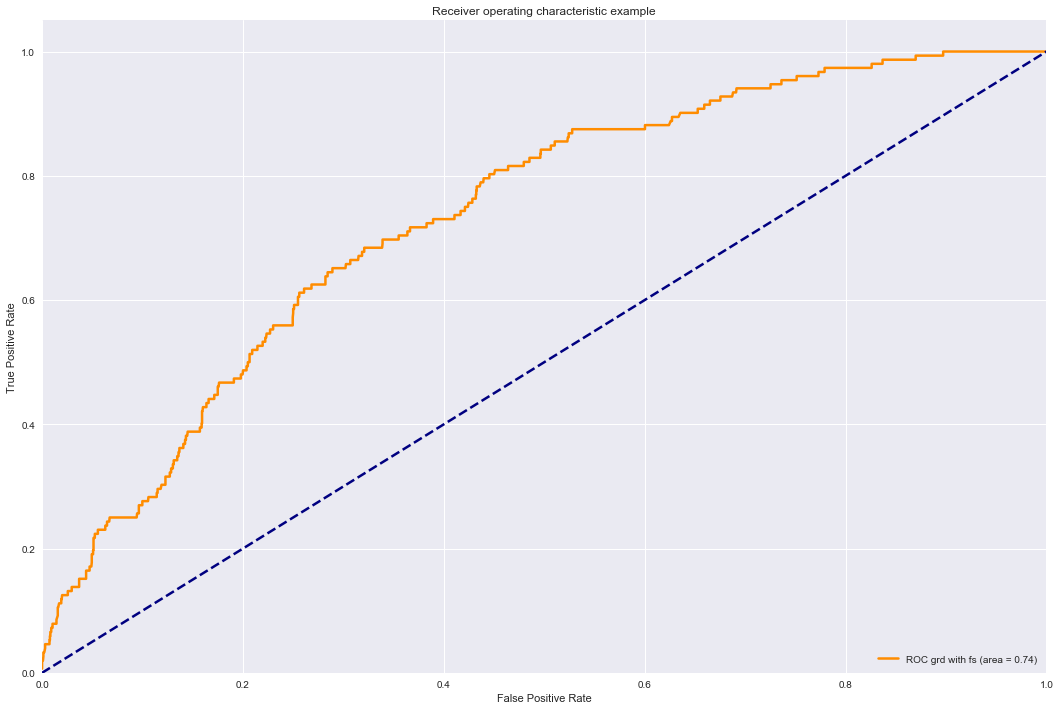

In [115]:
fprgrd, tprgrd, thresholdsgrd = metrics.roc_curve(Y_test, grd.predict_proba(X_new_test)[:,1])
plt.figure(figsize=(18,12))
lw = 2.5
plt.plot(fprgrd, tprgrd, color='darkorange',
         lw=lw, label='ROC grd with fs (area = %0.2f)' % auc(fprgrd, tprgrd))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

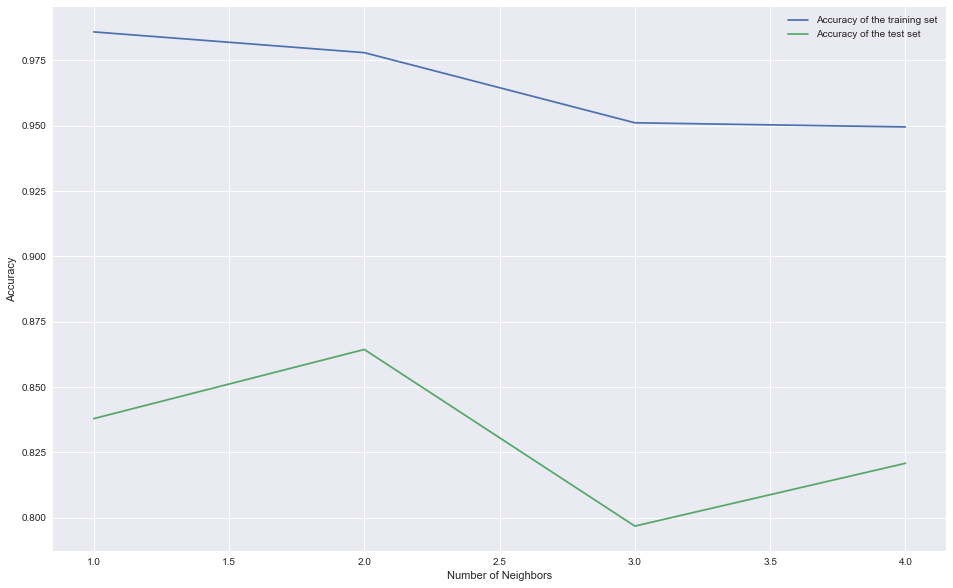

In [41]:
from sklearn.neighbors import KNeighborsClassifier

training_accuracy =[]
test_accuracy=[]
neighbors_settings=range(1,5)
plt.figure(figsize=(16, 10))
for n_neighbors in neighbors_settings :
    clf=KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_new_app,Y_Train)
    training_accuracy.append(clf.score(X_new_app,Y_Train))
    test_accuracy.append(clf.score(X_new_test,Y_test))
    
plt.plot(neighbors_settings,training_accuracy,label='Accuracy of the training set')
plt.plot(neighbors_settings,test_accuracy,label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.legend()

Accuracy of KNN n=2 , on the training set : 0.978
Accuracy of KNN n=2 , on the test set :0.864
             precision    recall  f1-score   support

          0       0.91      0.94      0.93      2221
          1       0.18      0.11      0.14       235

avg / total       0.84      0.86      0.85      2456



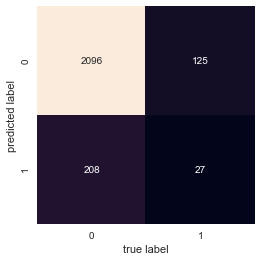

In [42]:
knn=KNeighborsClassifier(2)
knn.fit(X_new_app,Y_Train)
print('Accuracy of KNN n=2 , on the training set : {:.3f}'.format(knn.score(X_new_app,Y_Train)))
print('Accuracy of KNN n=2 , on the test set :{:.3f}'.format(knn.score(X_new_test,Y_test)))
predictions = knn.predict(X_new_test) 
print(metrics.classification_report(predictions, Y_test))
mat = confusion_matrix(Y_test, predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

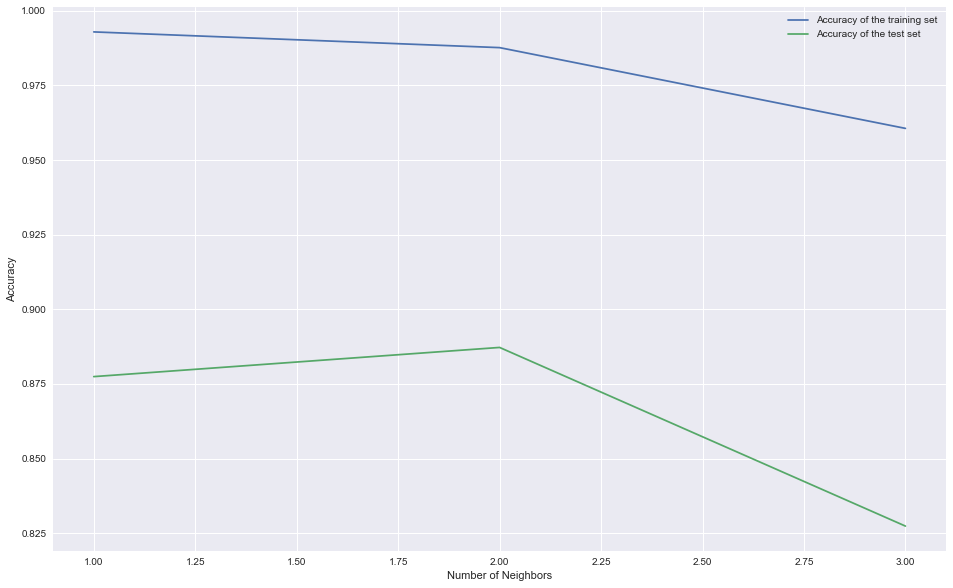

In [43]:
training_accuracy =[]
test_accuracy=[]

neighbors_settings=range(1,4)
plt.figure(figsize=(16, 10))
for n_neighbors in neighbors_settings :
    clf=KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_Train,Y_Train)
    training_accuracy.append(clf.score(X_Train,Y_Train))
    test_accuracy.append(clf.score(X_test,Y_test))
    
plt.plot(neighbors_settings,training_accuracy,label='Accuracy of the training set')
plt.plot(neighbors_settings,test_accuracy,label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.legend()

Accuracy of KNN n=2 , on the training set : 0.988
Accuracy of KNN n=2 , on the test set :0.887
             precision    recall  f1-score   support

          0       0.94      0.94      0.94      2285
          1       0.15      0.13      0.14       171

avg / total       0.88      0.89      0.88      2456



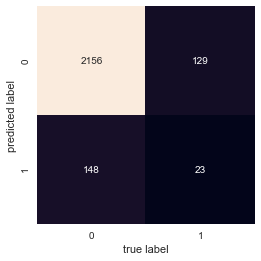

In [44]:
knn1=KNeighborsClassifier(2)

knn1.fit(X_Train,Y_Train)
print('Accuracy of KNN n=2 , on the training set : {:.3f}'.format(knn1.score(X_Train,Y_Train)))
print('Accuracy of KNN n=2 , on the test set :{:.3f}'.format(knn1.score(X_test,Y_test)))

predictions = knn1.predict(X_test)
 
print(metrics.classification_report(predictions, Y_test))
mat = confusion_matrix(Y_test, predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

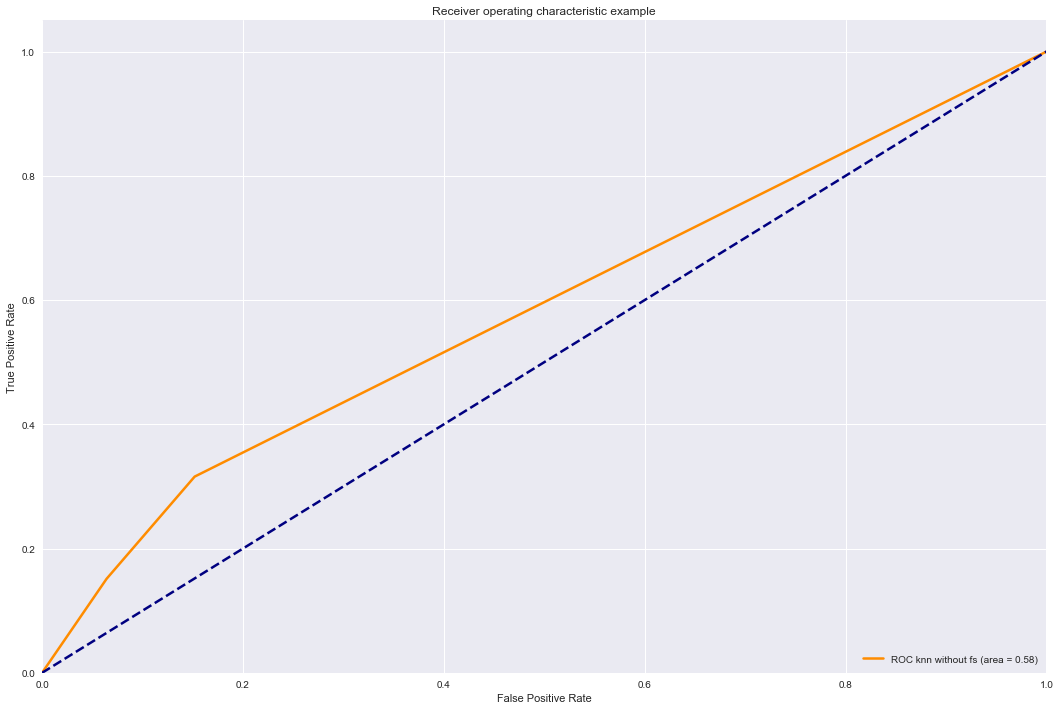

In [45]:
fprknn1, tprknn1, thresholdsknn1 = metrics.roc_curve(Y_test, knn1.predict_proba(X_test)[:,1])
plt.figure(figsize=(18,12))
lw = 2.5
plt.plot(fprknn1, tprknn1, color='darkorange',
         lw=lw, label='ROC knn without fs (area = %0.2f)' % auc(fprknn1, tprknn1))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

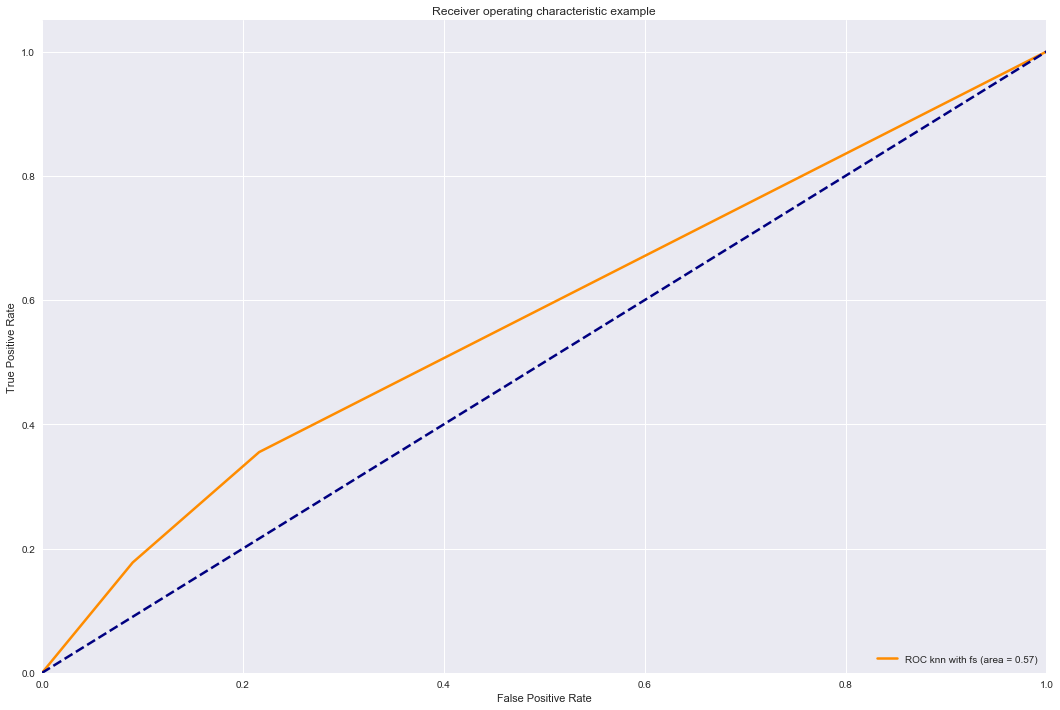

In [46]:
fprknn, tprknn, thresholdsknn = metrics.roc_curve(Y_test, knn.predict_proba(X_new_test)[:,1])
plt.figure(figsize=(18,12))
lw = 2.5
plt.plot(fprknn, tprknn, color='darkorange',
         lw=lw, label='ROC knn with fs (area = %0.2f)' % auc(fprknn, tprknn))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

0.915716612378
             precision    recall  f1-score   support

          0       0.97      0.94      0.96      2375
          1       0.09      0.16      0.11        81

avg / total       0.94      0.92      0.93      2456



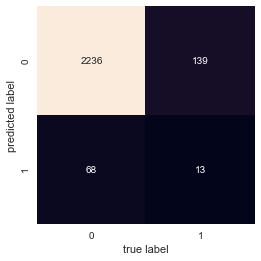

In [47]:
rf_gs1=RandomForestClassifier(n_estimators=10)
#parameters = {'max_depth':[5, 20], 'n_estimators':[10,300]}
#rf_gs1 = GridSearchCV(rf, parameters)
#rf_gs1.fit(X_Train, Y_Train)
rf_gs1.fit(X_Train, Y_Train)
print(rf_gs1.score(X_test, Y_test))

predictions=rf_gs1.predict(X_test)
print(metrics.classification_report(predictions, Y_test))
mat = confusion_matrix(Y_test, predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

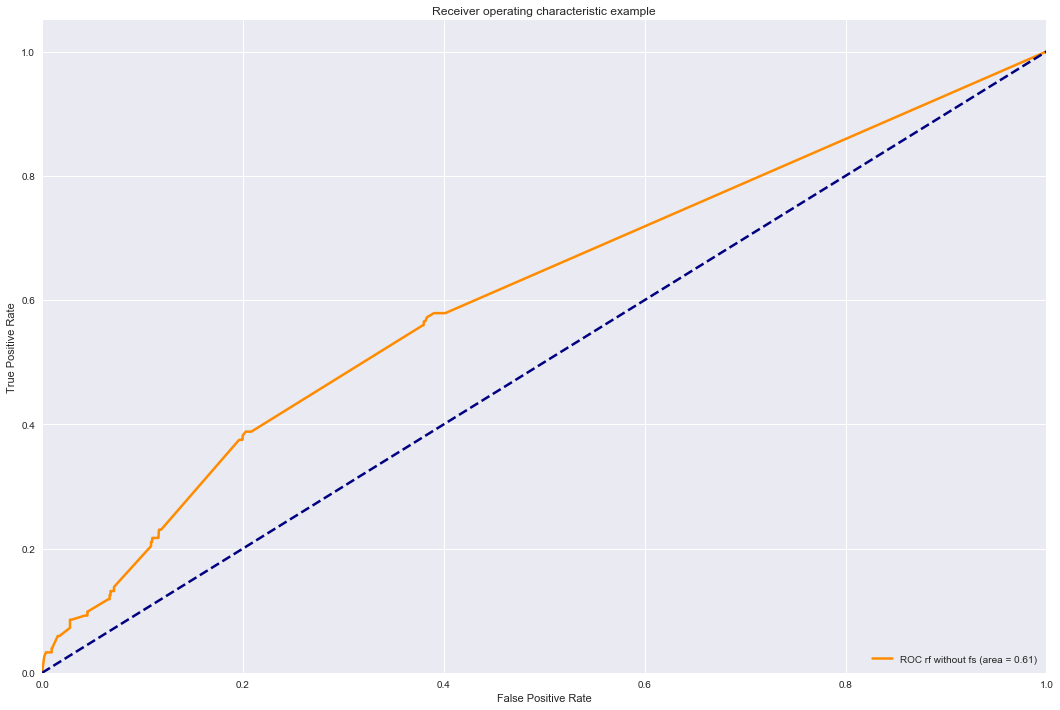

In [48]:
fprrf1, tprrf1, thresholdsrf1 = metrics.roc_curve(Y_test, rf_gs1.predict_proba(X_test)[:,1])
plt.figure(figsize=(18,12))
lw = 2.5
plt.plot(fprrf1, tprrf1, color='darkorange',
         lw=lw, label='ROC rf without fs (area = %0.2f)' % auc(fprrf1, tprrf1))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

0.915716612378
             precision    recall  f1-score   support

          0       0.97      0.94      0.96      2379
          1       0.07      0.14      0.10        77

avg / total       0.94      0.92      0.93      2456



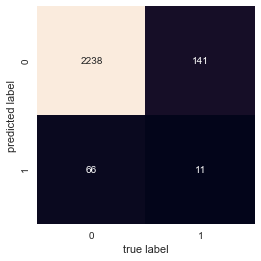

In [49]:
rf=RandomForestClassifier()
parameters = {'max_depth':[5, 25], 'n_estimators':[5,400]}
rf_gs = GridSearchCV(rf, parameters)
rf_gs.fit(X_new_app, Y_Train)
print(rf_gs.score(X_new_test, Y_test))

predictions=rf_gs.predict(X_new_test)
print(metrics.classification_report(predictions, Y_test))
mat = confusion_matrix(Y_test, predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

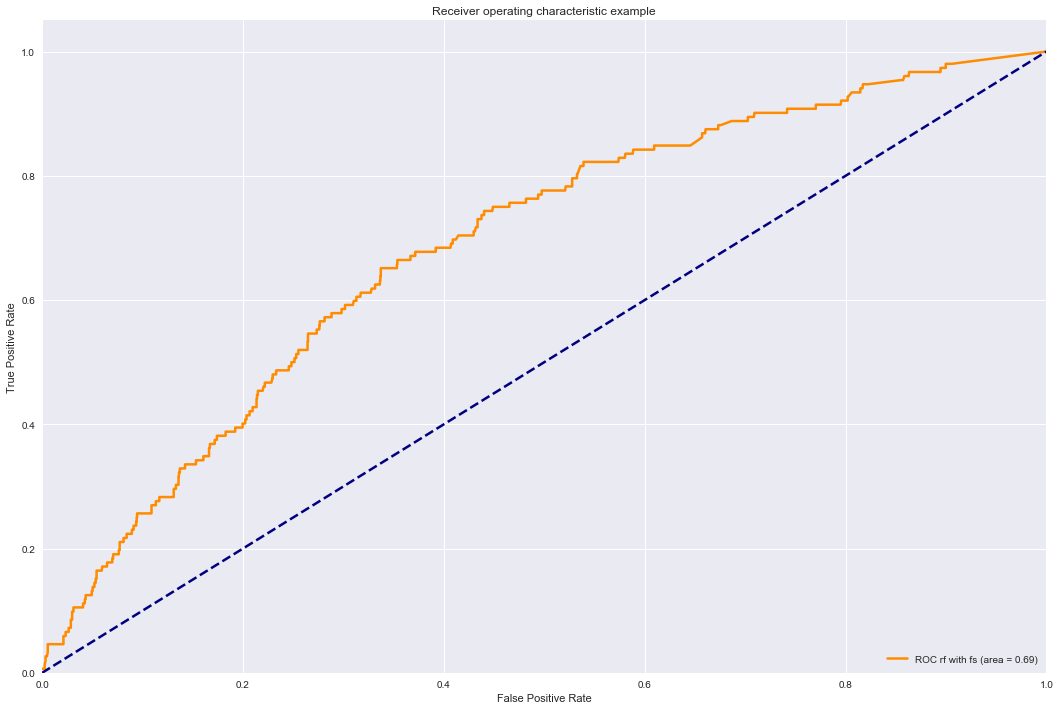

In [50]:
fprrf, tprrf, thresholdsrf = metrics.roc_curve(Y_test, rf_gs.predict_proba(X_new_test)[:,1])
plt.figure(figsize=(18,12))
lw = 2.5
plt.plot(fprrf, tprrf, color='darkorange',
         lw=lw, label='ROC rf with fs (area = %0.2f)' % auc(fprrf, tprrf))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [11]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

grdc = GradientBoostingClassifier()

gbHyperParams = {'loss' : ['deviance', 'exponential'],
                 'n_estimators': randint(10, 100),
                 'max_depth': randint(10,40)}

gridSearchGB = RandomizedSearchCV(estimator=grdc, param_distributions=gbHyperParams, n_iter=10,
                                   scoring='roc_auc', verbose=4).fit(X_Train, Y_Train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] max_depth=36, n_estimators=24, loss=deviance ....................
[CV]  max_depth=36, n_estimators=24, loss=deviance, score=0.9108010829636348, total=  13.2s
[CV] max_depth=36, n_estimators=24, loss=deviance ....................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.3s remaining:    0.0s


[CV]  max_depth=36, n_estimators=24, loss=deviance, score=0.9683730505656537, total=  19.8s
[CV] max_depth=36, n_estimators=24, loss=deviance ....................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   33.2s remaining:    0.0s


[CV]  max_depth=36, n_estimators=24, loss=deviance, score=0.9608935057341362, total=  20.4s
[CV] max_depth=19, n_estimators=16, loss=exponential .................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   53.8s remaining:    0.0s


[CV]  max_depth=19, n_estimators=16, loss=exponential, score=0.926640327216914, total=   9.7s
[CV] max_depth=19, n_estimators=16, loss=exponential .................
[CV]  max_depth=19, n_estimators=16, loss=exponential, score=0.9822450997689135, total=  14.3s
[CV] max_depth=19, n_estimators=16, loss=exponential .................
[CV]  max_depth=19, n_estimators=16, loss=exponential, score=0.965908490940578, total=  13.4s
[CV] max_depth=29, n_estimators=71, loss=exponential .................
[CV]  max_depth=29, n_estimators=71, loss=exponential, score=0.9182039376263408, total=  40.1s
[CV] max_depth=29, n_estimators=71, loss=exponential .................
[CV]  max_depth=29, n_estimators=71, loss=exponential, score=0.9745861195145135, total= 1.0min
[CV] max_depth=29, n_estimators=71, loss=exponential .................
[CV]  max_depth=29, n_estimators=71, loss=exponential, score=0.9707859403045592, total=  56.0s
[CV] max_depth=38, n_estimators=32, loss=deviance ....................
[CV]  

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 18.0min finished


In [12]:
gridSearchGB.best_params_, gridSearchGB.best_score_

({'loss': 'exponential', 'max_depth': 18, 'n_estimators': 96},
 0.98628956695990966)

0.699511400651
             precision    recall  f1-score   support

          0       0.71      0.96      0.82      1692
          1       0.59      0.12      0.19       764

avg / total       0.67      0.70      0.62      2456



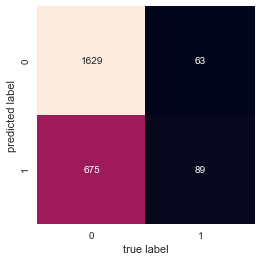

In [52]:
from sklearn.neural_network import MLPClassifier


clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(4, 2), random_state=1)
clf.fit(X_Train, Y_Train)       

print(clf.score(X_test, Y_test))

predictions=clf.predict(X_test)
print(metrics.classification_report(predictions, Y_test))
mat = confusion_matrix(Y_test, predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

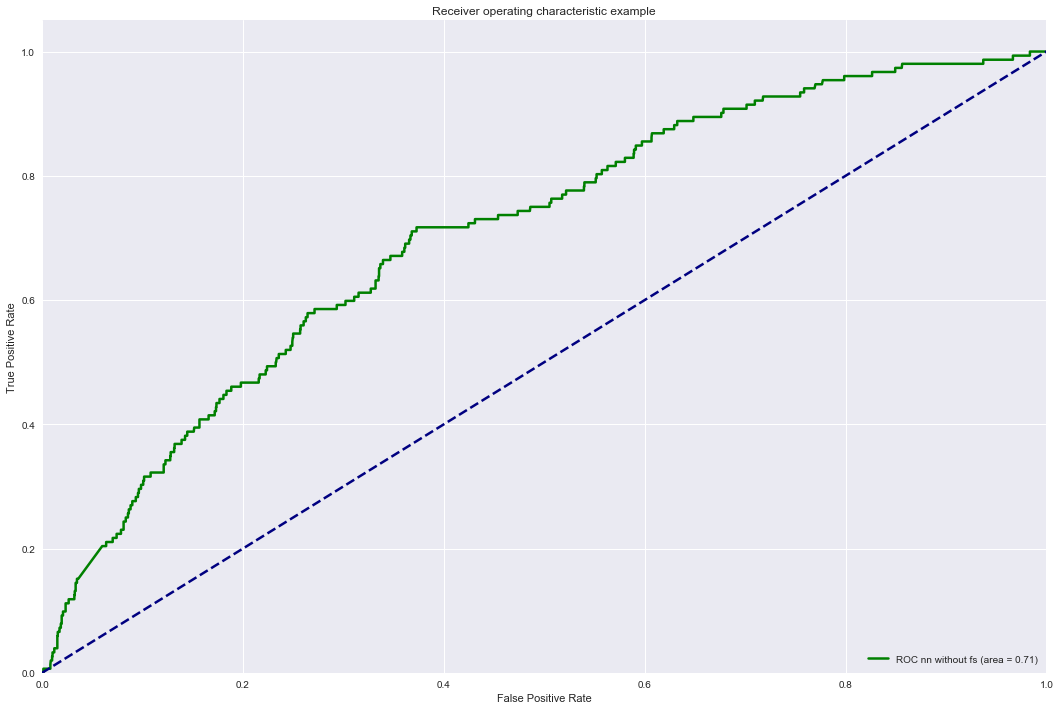

In [53]:
fprnn, tprnn, thresholdsnn = metrics.roc_curve(Y_test, clf.predict_proba(X_test)[:,1])
plt.figure(figsize=(18,12))
lw = 2.5

plt.plot(fprnn, tprnn, color='green',
         lw=lw, label='ROC nn without fs (area = %0.2f)' % auc(fprnn, tprnn))


plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

0.915309446254
             precision    recall  f1-score   support

          0       0.97      0.95      0.96      2352
          1       0.16      0.23      0.19       104

avg / total       0.93      0.92      0.92      2456



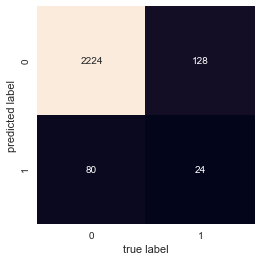

In [104]:
from sklearn.ensemble import VotingClassifier

clf_voting = VotingClassifier(
    estimators=[('lr', log_r), ('grd', grd1),('rf', rf_gs)],
    voting='soft')

clf_voting.fit(X_Train, Y_Train)       

print(clf_voting.score(X_test, Y_test))

predictions=clf_voting.predict(X_test)
print(metrics.classification_report(predictions, Y_test))
mat = confusion_matrix(Y_test, predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

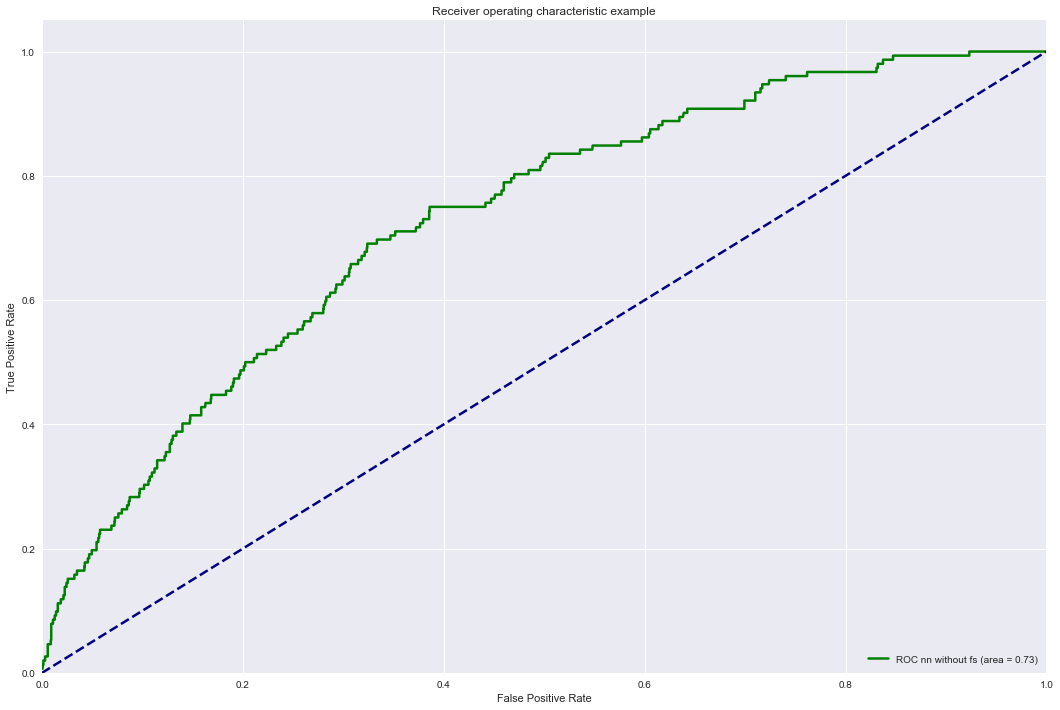

In [105]:
fprnn, tprnn, thresholdsnn = metrics.roc_curve(Y_test, clf_voting.predict_proba(X_test)[:,1])
plt.figure(figsize=(18,12))
lw = 2.5

plt.plot(fprnn, tprnn, color='green',
         lw=lw, label='ROC nn without fs (area = %0.2f)' % auc(fprnn, tprnn))


plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

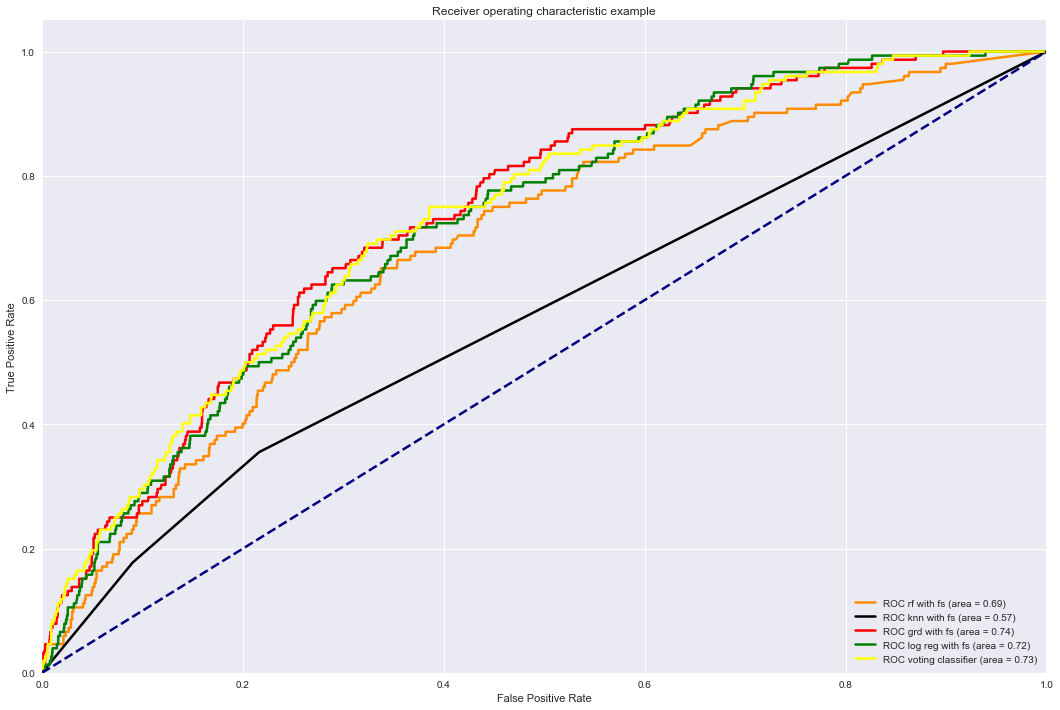

In [116]:
plt.figure(figsize=(18,12))

lw = 2.5
plt.plot(fprrf, tprrf, color='darkorange',
         lw=lw, label='ROC rf with fs (area = %0.2f)' % auc(fprrf, tprrf))
plt.plot(fprknn, tprknn, color='black',
         lw=lw, label='ROC knn with fs (area = %0.2f)' % auc(fprknn, tprknn))
plt.plot(fprgrd, tprgrd, color='red',
         lw=lw, label='ROC grd with fs (area = %0.2f)' % auc(fprgrd, tprgrd))
plt.plot(fprlR, tprlR, color='green',
         lw=lw, label='ROC log reg with fs (area = %0.2f)' % auc(fprlR, tprlR))
plt.plot(fprnn, tprnn, color='yellow',
         lw=lw, label='ROC voting classifier (area = %0.2f)' % auc(fprnn, tprnn))


plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

__These are the roc curves of all the previous models with features selection.__<br><br>
__It shows that the best models in identifying our target customer are the:__
- __The gradient boosting classifier.__
- __The voting classifier.__
- __The logistic regression classifier.__


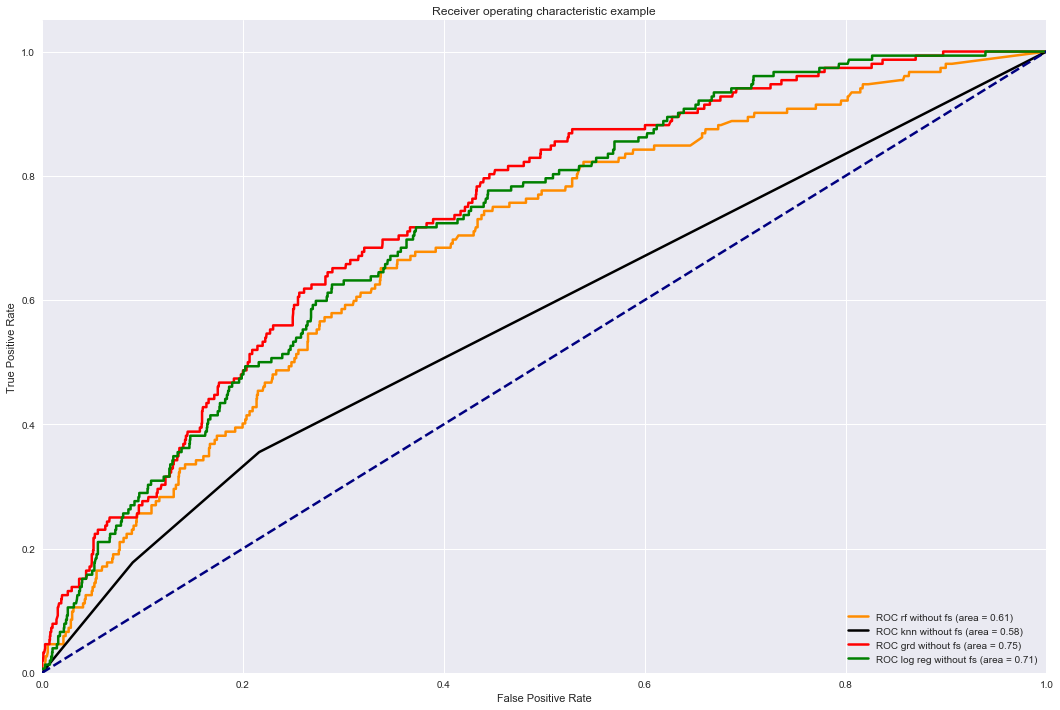

In [117]:
plt.figure(figsize=(18,12))
lw = 2.5
plt.plot(fprrf, tprrf, color='darkorange',
         lw=lw, label='ROC rf without fs (area = %0.2f)' % auc(fprrf1, tprrf1))
plt.plot(fprknn, tprknn, color='black',
         lw=lw, label='ROC knn without fs (area = %0.2f)' % auc(fprknn1, tprknn1))
plt.plot(fprgrd, tprgrd, color='red',
         lw=lw, label='ROC grd without fs (area = %0.2f)' % auc(fprgrd1, tprgrd1))
plt.plot(fprlR, tprlR, color='green',
         lw=lw, label='ROC log reg without fs (area = %0.2f)' % auc(fprR, tprR))


plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

__These are the roc curves of all the previous models without features selection.__<br><br>
__It shows that the best model in identifying our target customer is by far:__
- __The gradient boosting classifier.__



In [57]:
def get_rappel_taille(x):
    #calculate the posterior probabilities for the test sample 
    probas = x.predict_proba(X_test) 
    #score for 'presence‘ (positive class value) 
    score = probas[:,1] # [0.86238322  0.21334963  0.15895063 …]
    #transforming in 0/1 (dummy variables) the Y_test vector 
    pos = pd.get_dummies(Y_test).as_matrix() 
    #get the second column (index = 1) 
    pos = pos[:,1] # [ 1  0  0  1  0  0  1  1 …] 
    #number of “positive” instances 
    npos = np.sum(pos) # 99 – there are 99 ‘’positive’’ instances into the test set
    #indices that would sort according to the score
    index = np.argsort(score) # [ 55  45  265  261 … 11  255  159] 
    #invert the indices, first the instances with the highest score 
    index = index[::-1] # [ 159  255  11 … 261  265  45  55 ]
    #sort the class membership according to the indices
    sort_pos= pos[index] # [ 1  1  1  1  1  0  1 1 …] 
    #cumulated sum 
    cpos = np.cumsum(sort_pos) # [ 1  2  3  4  5  5  6 7 … 99] 
    #recall column
    rappel2 = cpos/npos # [ 1/99  2/99  3/99  4/99  5/99  5/99  6/99  7/99 … 99/99] 
    #nb. of instances into the test set 
    n = Y_test.shape[0] # 300, ily a 300 ind. dansl’éch. test 
    #target size 
    taille2= np.arange(start=1,stop=2457,step=1) # [1  2  3  4  5  …  300] 
    #target size in percentage 
    taille2= taille2/ n # [ 1/300  2/300  3/300 … 300/300 ]
    return taille2,rappel2

## Tree base features selection:


In [96]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

print("Initial shape: ", X_Train.shape)

clf = ExtraTreesClassifier()
clf = clf.fit(X_Train, Y_Train)

model = SelectFromModel(clf, prefit=True)
X_new1 = model.transform(X_Train)
X_new_test1=model.transform(X_test)
print("New shape: ", X_new1.shape)
features_name=list(X_train)
print(sorted(zip(clf.feature_importances_, features_name), reverse=True))

Initial shape:  (13860, 85)
New shape:  (13860, 47)
[(0.082276448563603083, 'PO44'), (0.050707742999895299, 'PO47'), (0.039589616177916766, 'PO65'), (0.035639571761133249, 'PO68'), (0.030332848019729908, 'PO59'), (0.024250994406784417, 'PO80'), (0.021218887424813839, 'SD5'), (0.021053577688207141, 'SD1'), (0.019730934492345871, 'SD32'), (0.018871432565154556, 'SD30'), (0.018470842790217962, 'SD43'), (0.018401364639218619, 'SD18'), (0.017699863253917668, 'SD6'), (0.017580260444502335, 'SD42'), (0.017566737589248316, 'SD39'), (0.017357024108303341, 'SD31'), (0.016721908420489574, 'SD34'), (0.016587653836731709, 'SD10'), (0.01641631476649965, 'SD3'), (0.016359197606658146, 'SD19'), (0.016358746257173325, 'SD15'), (0.015981576615239086, 'SD21'), (0.01586853298809263, 'SD36'), (0.015591136089189512, 'SD9'), (0.015175762827844035, 'SD26'), (0.014908358162687452, 'SD37'), (0.014864492106936361, 'SD16'), (0.014751762418218994, 'SD7'), (0.014469319816405198, 'SD25'), (0.014315018230081944, 'SD1

             precision    recall  f1-score   support

          0       0.71      0.96      0.82      1689
          1       0.61      0.12      0.20       767

avg / total       0.68      0.70      0.62      2456



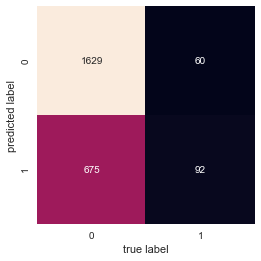

In [64]:
log_r = LogisticRegression()
log_r.fit(X_new1, Y_Train)
log_r.score(X_new_test1, Y_test)
predictions=log_r.predict(X_new_test1)
print(metrics.classification_report(predictions, Y_test))
mat = confusion_matrix(Y_test, predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

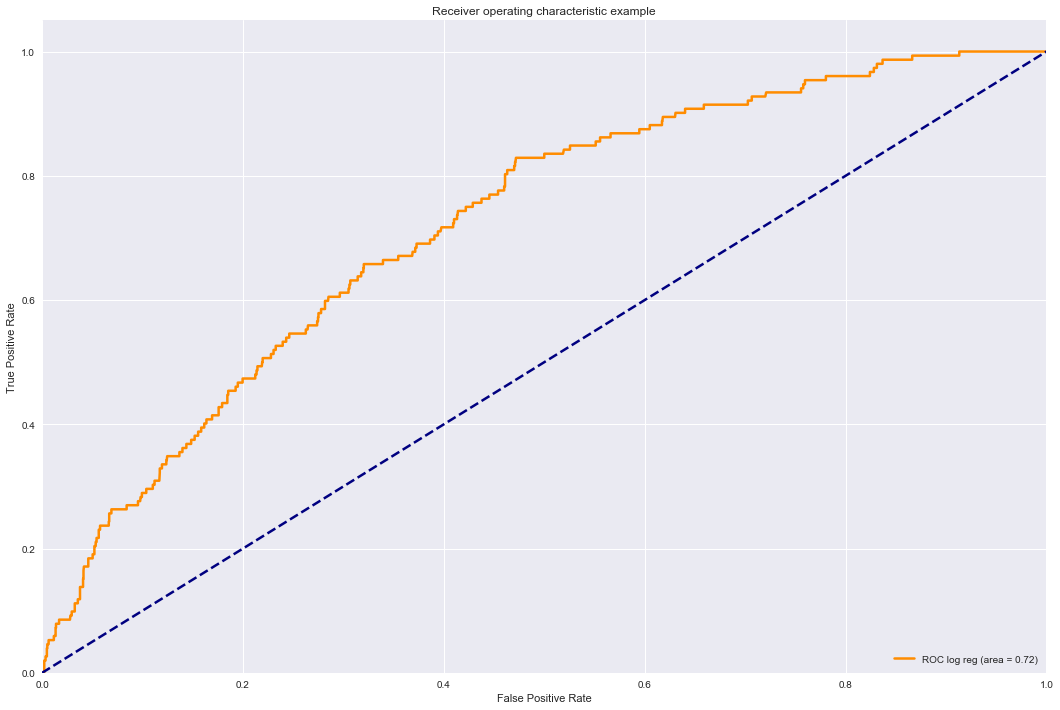

In [66]:
fprR, tprR, thresholdsR = metrics.roc_curve(Y_test, log_r.predict_proba(X_new_test1)[:,1])
plt.figure(figsize=(18,12))
lw = 2.5
plt.plot(fprR, tprR, color='darkorange',
         lw=lw, label='ROC log reg (area = %0.2f)' % auc(fprR, tprR))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

             precision    recall  f1-score   support

          0       0.98      0.94      0.96      2383
          1       0.12      0.25      0.16        73

avg / total       0.95      0.92      0.94      2456



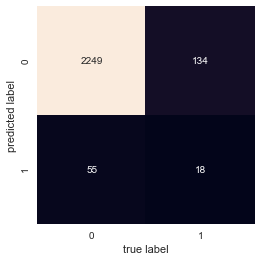

In [73]:
grd1 = GradientBoostingClassifier()
grd1.fit(X_new1,Y_Train)
grd1.score(X_new_test1, Y_test)

predictions=grd1.predict(X_new_test1)
print(metrics.classification_report(predictions, Y_test))
mat = confusion_matrix(Y_test, predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');


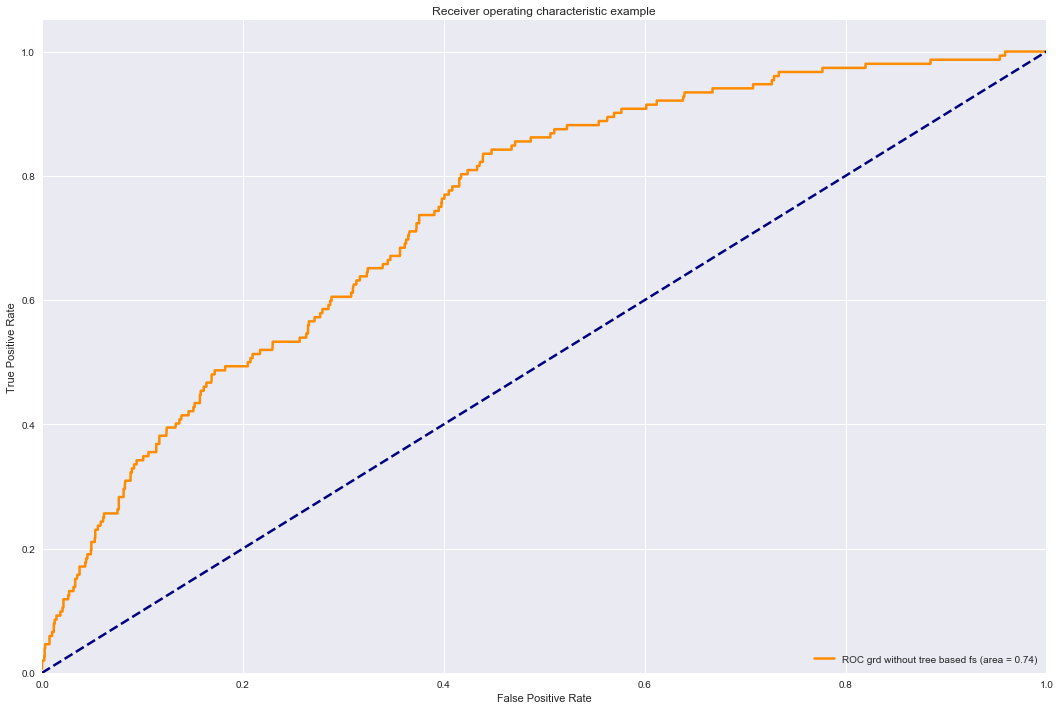

In [75]:
fprgrd1, tprgrd1, thresholdsgrd1 = metrics.roc_curve(Y_test, grd1.predict_proba(X_new_test1)[:,1])
plt.figure(figsize=(18,12))
lw = 2.5
plt.plot(fprgrd1, tprgrd1, color='darkorange',
         lw=lw, label='ROC grd without tree based fs (area = %0.2f)' % auc(fprgrd1, tprgrd1))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

             precision    recall  f1-score   support

          0       0.78      0.96      0.86      1864
          1       0.50      0.13      0.20       592

avg / total       0.71      0.76      0.70      2456



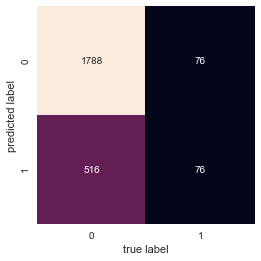

In [88]:
from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier(max_depth = 3, random_state = 42)
clf_dt.fit(X_new1, Y_Train)
clf_dt.score(X_new_test1, Y_test)
predictions=clf_dt.predict(X_new_test1)
print(metrics.classification_report(predictions, Y_test))
mat = confusion_matrix(Y_test, predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

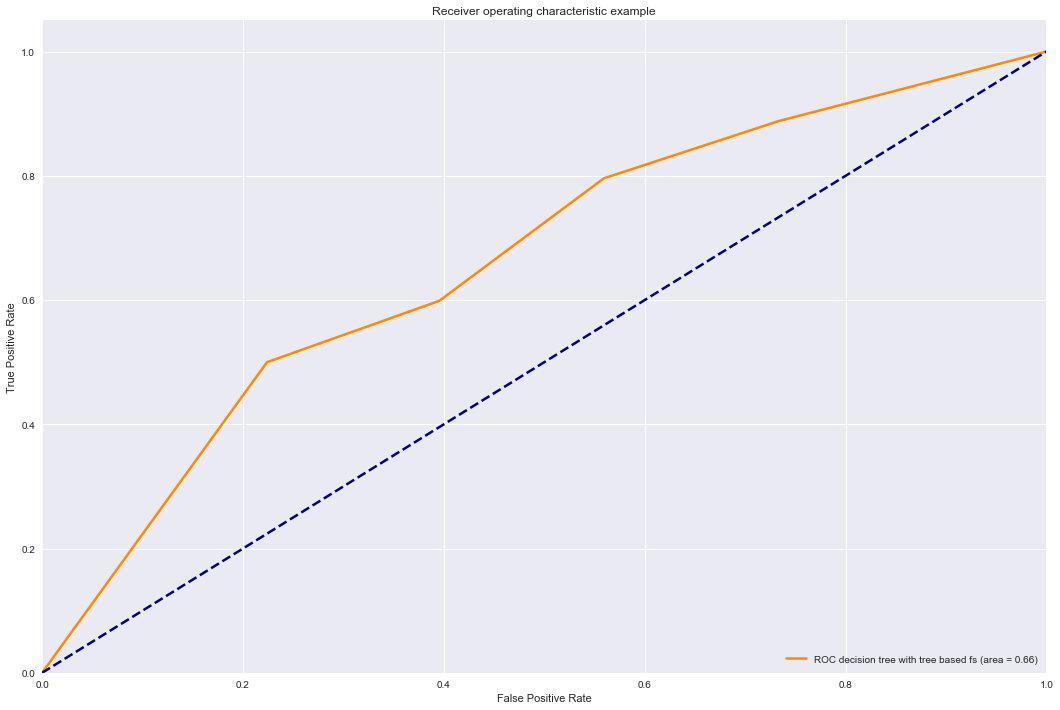

In [94]:
fprdt, tprdt, thresholdsdt = metrics.roc_curve(Y_test, clf_dt.predict_proba(X_new_test1)[:,1])
plt.figure(figsize=(18,12))
lw = 2.5
plt.plot(fprdt, tprdt, color='darkorange',
         lw=lw, label='ROC decision tree with tree based fs (area = %0.2f)' % auc(fprdt, tprdt))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

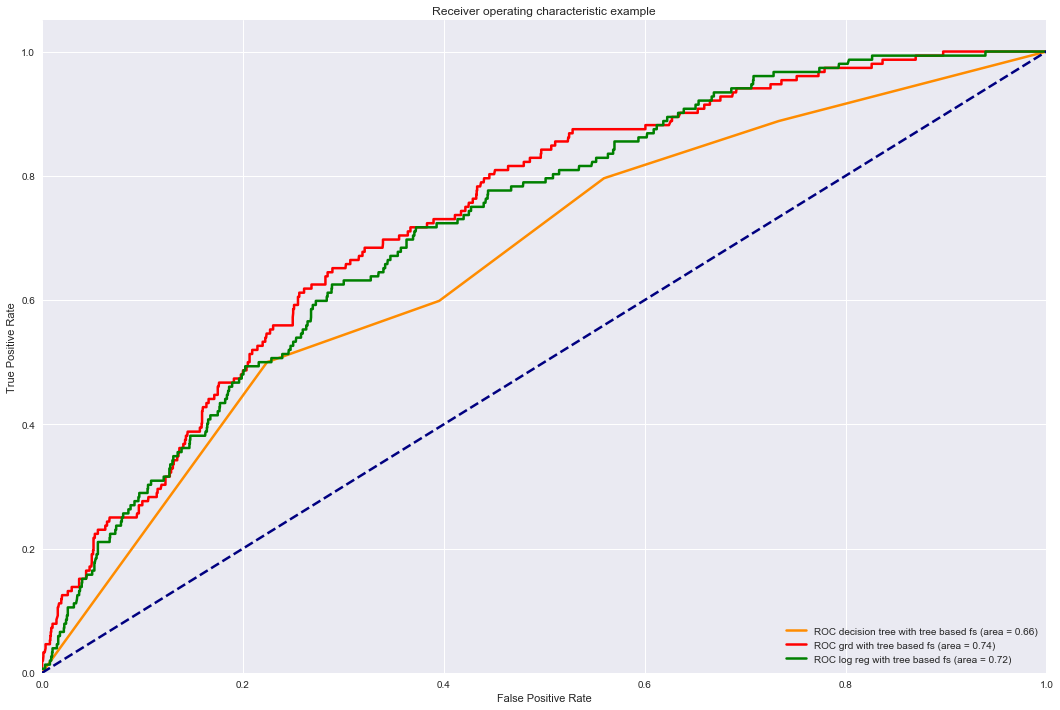

In [95]:
plt.figure(figsize=(18,12))
lw = 2.5
plt.plot(fprdt, tprdt, color='darkorange',
         lw=lw, label='ROC decision tree with tree based fs (area = %0.2f)' % auc(fprdt, tprdt))

plt.plot(fprgrd, tprgrd, color='red',
         lw=lw, label='ROC grd with tree based fs (area = %0.2f)' % auc(fprgrd1, tprgrd1))
plt.plot(fprlR, tprlR, color='green',
         lw=lw, label='ROC log reg with tree based fs (area = %0.2f)' % auc(fprR, tprR))


plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

__These are the roc curves of all the previous models with tree based features selection.__<br><br>
__The gradient boosting classifier is still the best.__


## Univariate Feature Selection:

__Univariate feature selection works by selecting the best features based on univariate statistical tests. It can be seen as a preprocessing step to an estimator.__

In [175]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

KBest = SelectKBest(chi2, k=30)
X_new2 = KBest.fit_transform(X_Train, Y_Train)
X_new_test2 = KBest.fit_transform(X_test, Y_test)

print(sorted(zip(KBest.scores_, features_name), reverse=True))
print(X_new_test.shape)

[(156.10494319012841, 'PO47'), (80.154477159001061, 'SD1'), (39.127881741986414, 'PO68'), (38.14986804258222, 'SD16'), (34.670147591200219, 'PO55'), (34.314616242347398, 'PO59'), (29.301112271962474, 'SD18'), (28.456175749412889, 'PO44'), (25.894696751644741, 'SD37'), (22.943284401602817, 'SD34'), (21.459944089233222, 'SD39'), (21.217145077654195, 'SD25'), (19.773829203446894, 'SD30'), (19.112181703014976, 'SD43'), (18.691891017867242, 'SD29'), (17.659110743823948, 'SD36'), (16.871487309600049, 'SD31'), (16.492045965730192, 'SD12'), (14.594358235739358, 'SD5'), (13.966658773061162, 'SD24'), (13.778562235597867, 'SD21'), (13.102545521989351, 'PO65'), (10.979065092843525, 'SD10'), (10.955579605415133, 'SD19'), (10.923761609907121, 'PO76'), (10.435448150078168, 'SD40'), (10.423611111111109, 'PO46'), (10.111206869941975, 'SD11'), (9.456947519634225, 'SD42'), (8.5120880734691919, 'SD13'), (8.2446318459895256, 'SD35'), (7.8039617152672331, 'SD32'), (7.6145224171539958, 'PO60'), (7.4926250183

             precision    recall  f1-score   support

          0       0.70      0.95      0.80      1702
          1       0.39      0.08      0.13       754

avg / total       0.60      0.68      0.60      2456



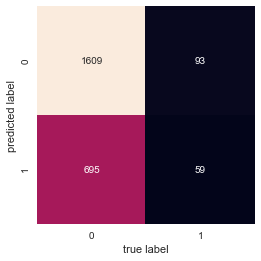

In [176]:
log_r = LogisticRegression()
log_r.fit(X_new2, Y_Train)
log_r.score(X_new_test2, Y_test)
predictions=log_r.predict(X_new_test2)
print(metrics.classification_report(predictions, Y_test))
mat = confusion_matrix(Y_test, predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

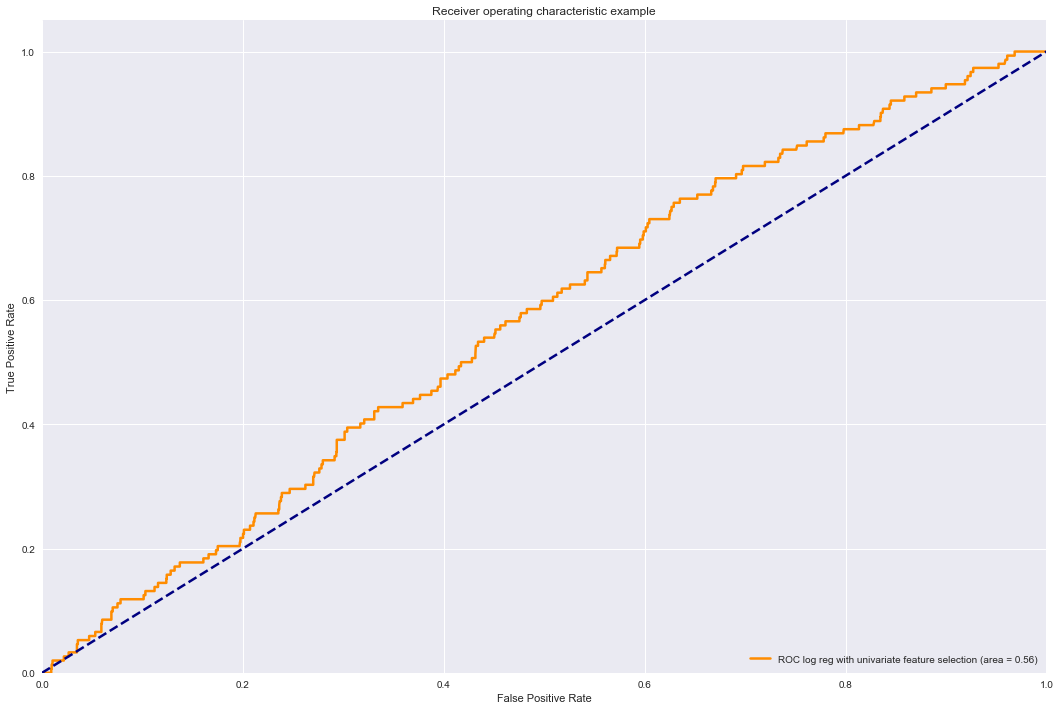

In [177]:
fprR, tprR, thresholdsR = metrics.roc_curve(Y_test, log_r.predict_proba(X_new_test2)[:,1])
plt.figure(figsize=(18,12))
lw = 2.5
plt.plot(fprR, tprR, color='darkorange',
         lw=lw, label='ROC log reg with univariate feature selection (area = %0.2f)' % auc(fprR, tprR))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

             precision    recall  f1-score   support

          0       0.93      0.94      0.93      2289
          1       0.06      0.05      0.06       167

avg / total       0.87      0.88      0.87      2456



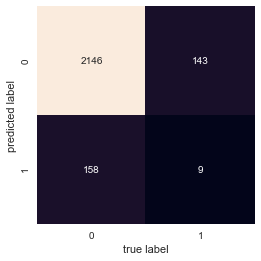

In [123]:
grd1 = GradientBoostingClassifier()
grd1.fit(X_new2,Y_Train)
grd1.score(X_new_test2, Y_test)

predictions=grd1.predict(X_new_test2)
print(metrics.classification_report(predictions, Y_test))
mat = confusion_matrix(Y_test, predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');


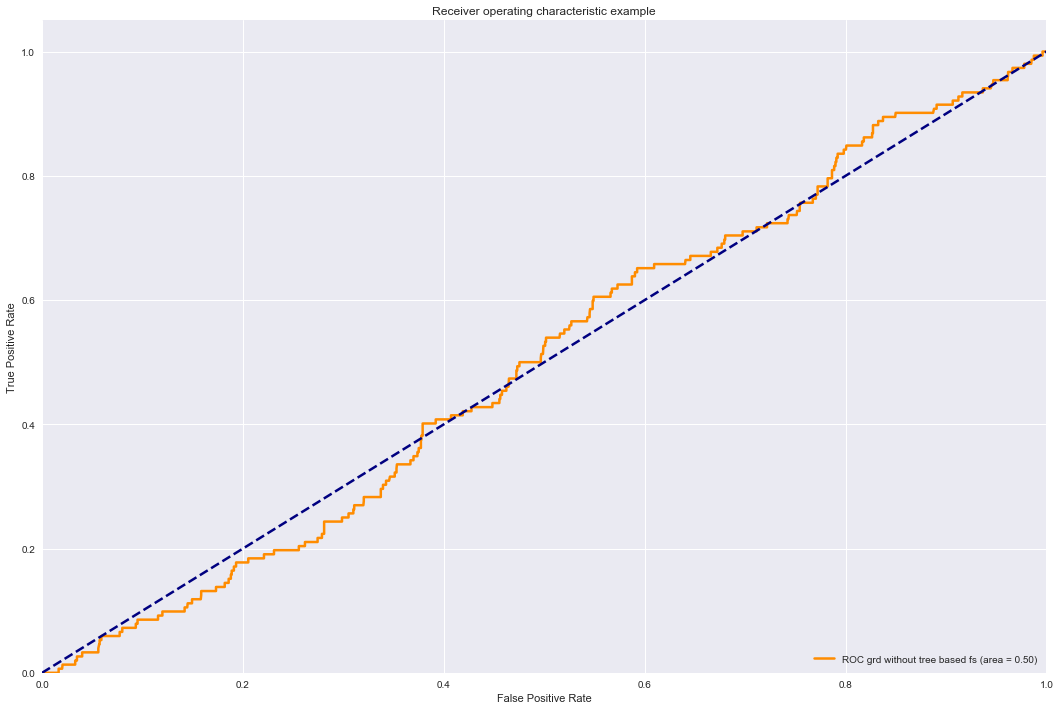

In [125]:
fprgrd1, tprgrd1, thresholdsgrd1 = metrics.roc_curve(Y_test, grd1.predict_proba(X_new_test2)[:,1])
plt.figure(figsize=(18,12))
lw = 2.5
plt.plot(fprgrd1, tprgrd1, color='darkorange',
         lw=lw, label='ROC grd without tree based fs (area = %0.2f)' % auc(fprgrd1, tprgrd1))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

__The results when using these set of features are not good.__

## Under Sampling:

In [201]:
from imblearn.under_sampling import RandomUnderSampler 

rus = RandomUnderSampler(ratio=0.3)
X_Train, Y_Train = rus.fit_sample(X_train, Y_train)
print(len(Y_Train))
print(Y_Train.mean())

1893
0.230850501849


c:\users\sedki\anaconda3\envs\datascience\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


             precision    recall  f1-score   support

          0       0.93      0.95      0.94      2259
          1       0.26      0.19      0.22       197

avg / total       0.88      0.89      0.88      2456



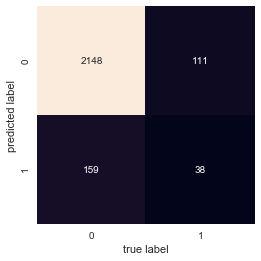

In [203]:
log_r = LogisticRegression()
log_r.fit(X_Train, Y_Train)
log_r.score(X_test, Y_test)
predictions=log_r.predict(X_test)
print(metrics.classification_report(predictions, Y_test))
mat = confusion_matrix(Y_test, predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

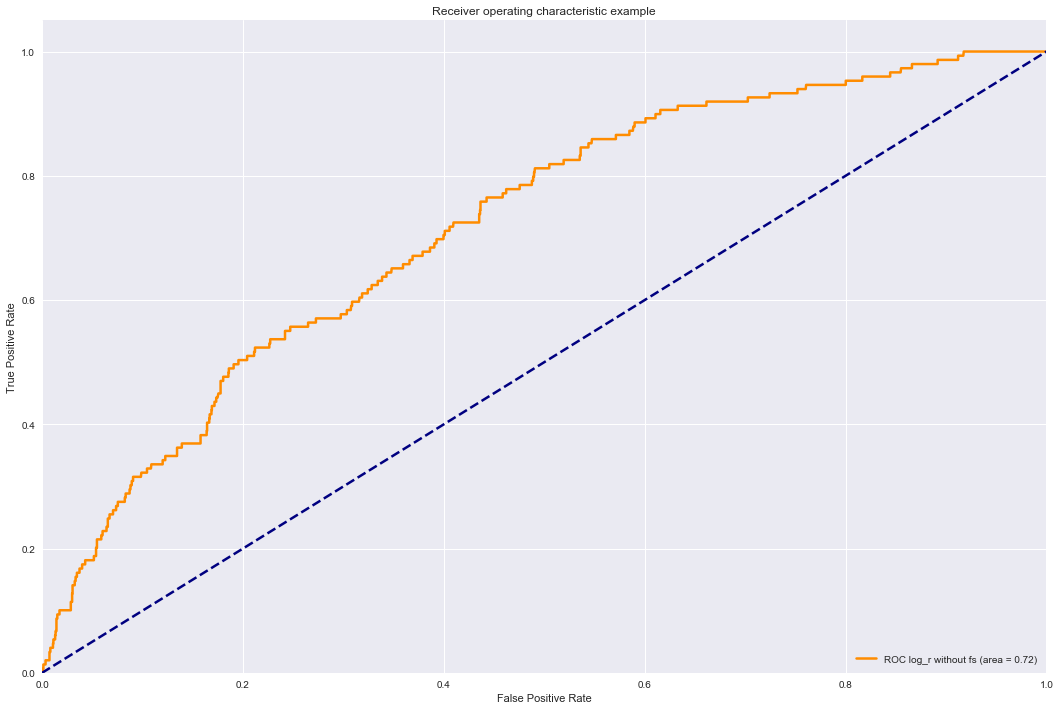

In [204]:
fprr, tprr, thresholdsr = metrics.roc_curve(Y_test, log_r.predict_proba(X_test)[:,1])
plt.figure(figsize=(18,12))
lw = 2.5
plt.plot(fprr, tprr, color='darkorange',
         lw=lw, label='ROC log_r without fs (area = %0.2f)' % auc(fprr, tprr))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

             precision    recall  f1-score   support

          0       0.94      0.95      0.94      2276
          1       0.23      0.19      0.21       180

avg / total       0.88      0.89      0.89      2456



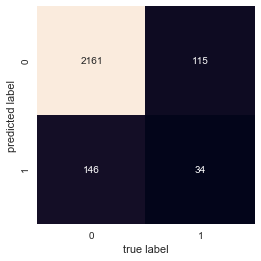

In [206]:
grd1 = GradientBoostingClassifier()
grd1.fit(X_Train,Y_Train)
grd1.score(X_test, Y_test)

predictions=grd1.predict(X_test)
print(metrics.classification_report(predictions, Y_test))
mat = confusion_matrix(Y_test, predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

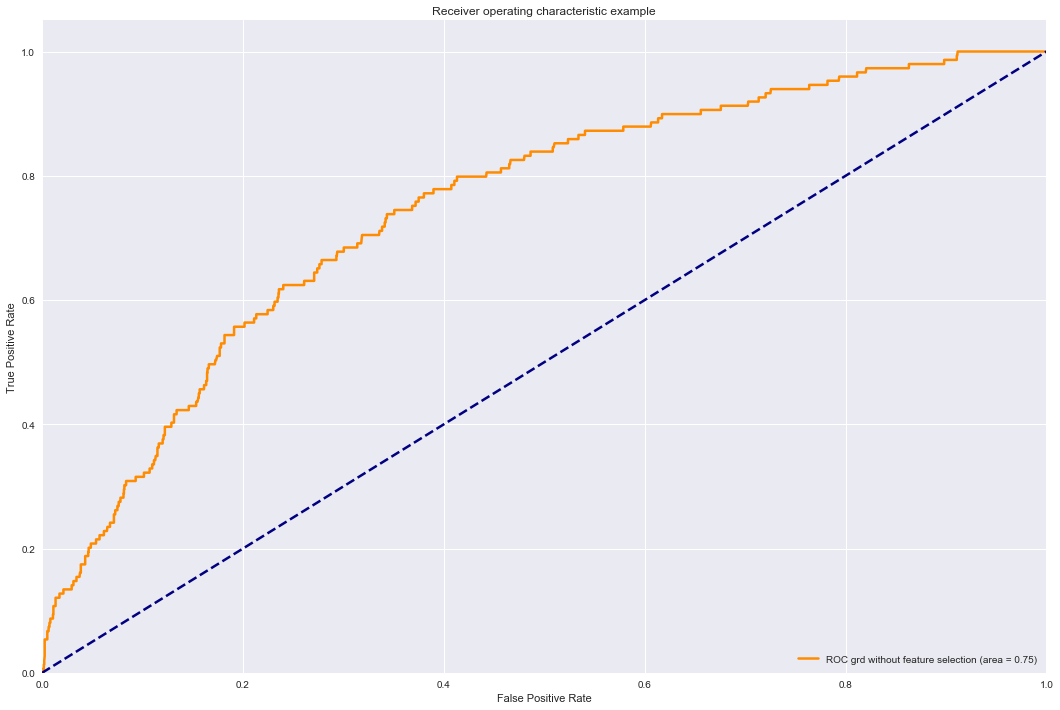

In [207]:
fprgrd, tprgrd, thresholdsgrd = metrics.roc_curve(Y_test, grd1.predict_proba(X_test)[:,1])
plt.figure(figsize=(18,12))
lw = 2.5
plt.plot(fprgrd, tprgrd, color='darkorange',
         lw=lw, label='ROC grd without feature selection (area = %0.2f)' % auc(fprgrd, tprgrd))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

(1880, 42)
(2456, 42)
0.921416938111
             precision    recall  f1-score   support

          0       0.96      0.96      0.96      2340
          1       0.21      0.23      0.22       116

avg / total       0.93      0.92      0.92      2456



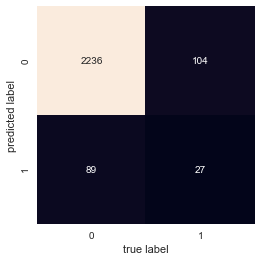

In [194]:
log_lm = LogisticRegression()

X_new_app = X_Train[:,sol.support_]
X_new_test = X_test.iloc[:,sol.support_]

print(X_new_app.shape) # (468, 4)  4 variables restantes
# fit the model on the selected attributes
modele_sel = log_lm.fit(X_new_app, Y_Train)
# matrix for the selected attributes – test set 
X_new_test = X_test.iloc[:,sol.support_].values
print(X_new_test.shape) # (300, 4)
# prediction on the test set 
y_pred_sel = modele_sel.predict(X_new_test)
# success rate 
print(metrics.accuracy_score(Y_test,y_pred_sel)) # 0.787

print(metrics.classification_report(y_pred_sel, Y_test))
mat = confusion_matrix(Y_test, y_pred_sel)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

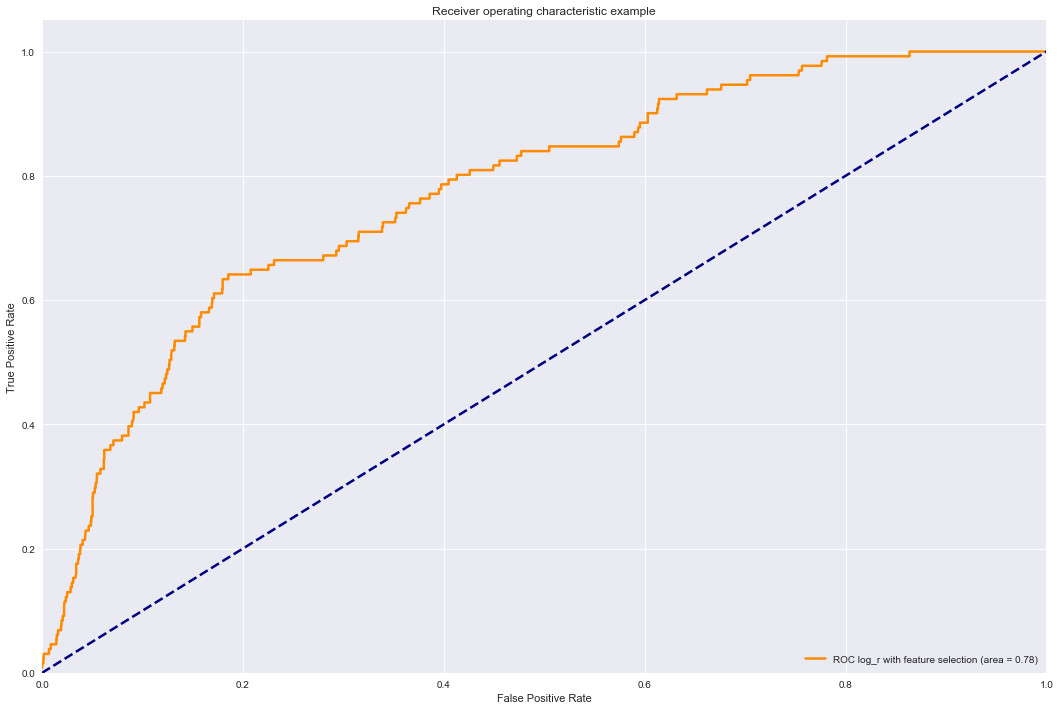

In [195]:
fprR1, tprR1, thresholdsR1 = metrics.roc_curve(Y_test, log_lm.predict_proba(X_new_test)[:,1])
plt.figure(figsize=(18,12))
lw = 2.5
plt.plot(fprR1, tprR1, color='darkorange',
         lw=lw, label='ROC log_r with feature selection (area = %0.2f)' % auc(fprR1, tprR1))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

             precision    recall  f1-score   support

          0       0.94      0.96      0.95      2276
          1       0.33      0.24      0.28       180

avg / total       0.90      0.91      0.90      2456



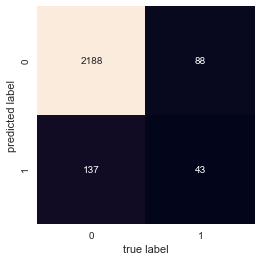

In [197]:
grd4 = GradientBoostingClassifier()
grd4.fit(X_new_app,Y_Train)
grd4.score(X_new_test, Y_test)

predictions=grd4.predict(X_new_test)
print(metrics.classification_report(predictions, Y_test))
mat = confusion_matrix(Y_test, predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

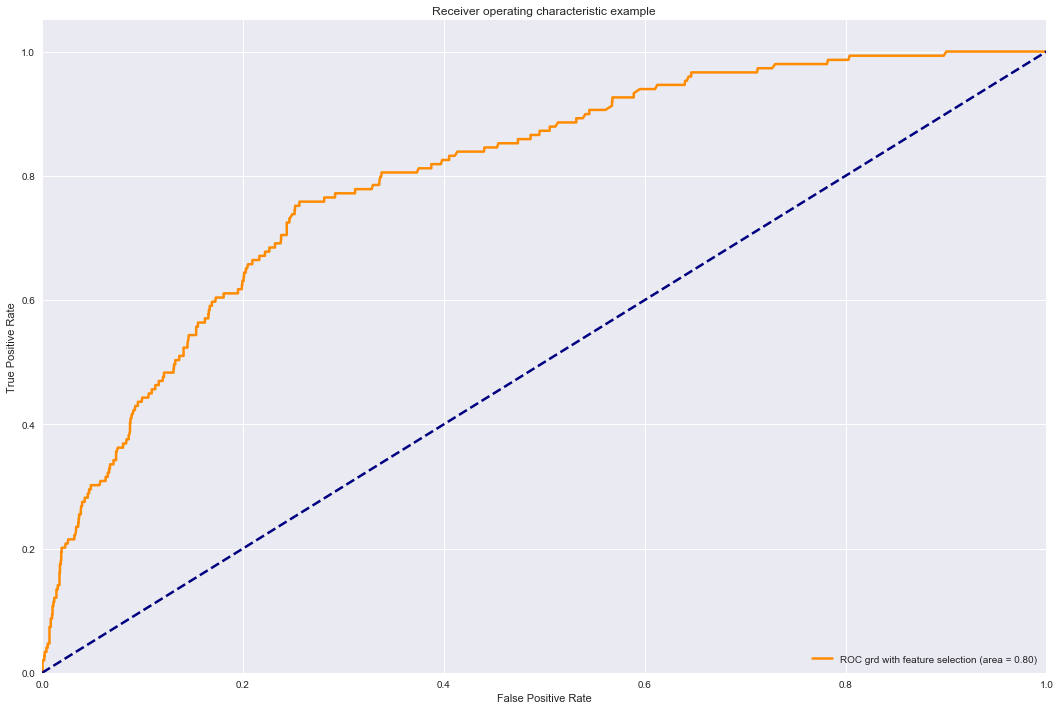

In [210]:
fprgrd4, tprgrd4, thresholdsgrd4 = metrics.roc_curve(Y_test, grd4.predict_proba(X_new_test)[:,1])
plt.figure(figsize=(18,12))
lw = 2.5
plt.plot(fprgrd4, tprgrd4, color='darkorange',
         lw=lw, label='ROC grd with feature selection (area = %0.2f)' % auc(fprgrd4, tprgrd4))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

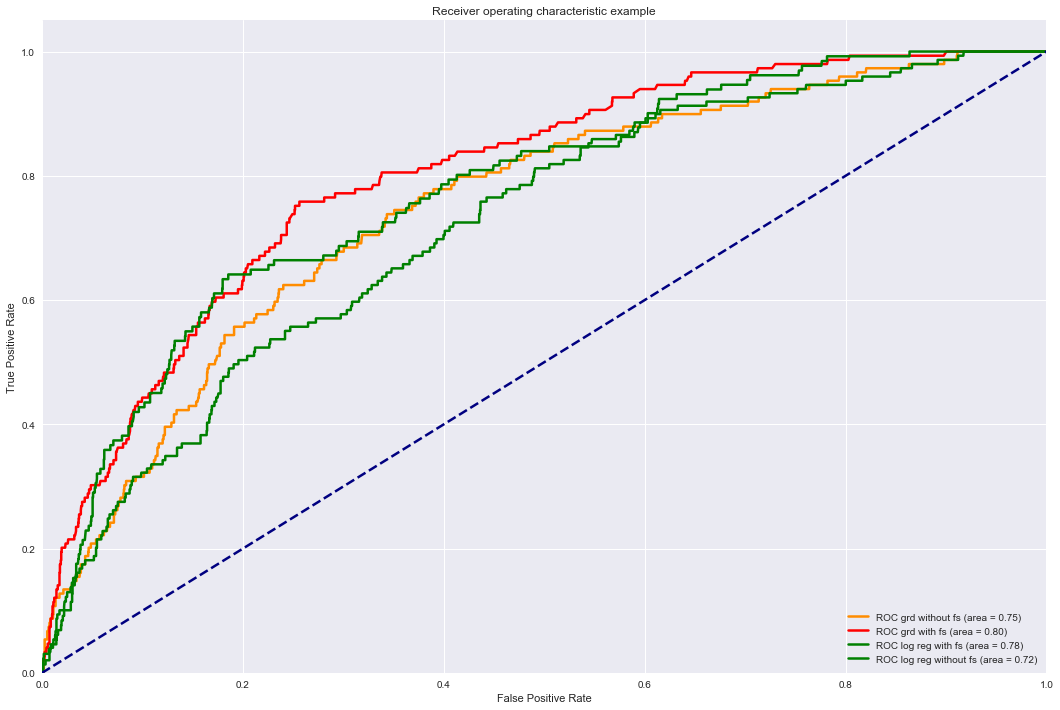

In [213]:
plt.figure(figsize=(18,12))
lw = 2.5
plt.plot(fprgrd, tprgrd, color='darkorange',
         lw=lw, label='ROC grd without fs (area = %0.2f)' % auc(fprgrd, tprgrd))

plt.plot(fprgrd4, tprgrd4, color='red',
         lw=lw, label='ROC grd with fs (area = %0.2f)' % auc(fprgrd4, tprgrd4))
plt.plot(fprR1, tprR1, color='green',
         lw=lw, label='ROC log reg with fs (area = %0.2f)' % auc(fprR1, tprR1))
plt.plot(fprr, tprr, color='green',
         lw=lw, label='ROC log reg without fs (area = %0.2f)' % auc(fprr, tprr))


plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

__These are the best models in predicting our wanted customers.__<br>
__The gradient boosting classifier in still the best model.__

## Gain Curve:

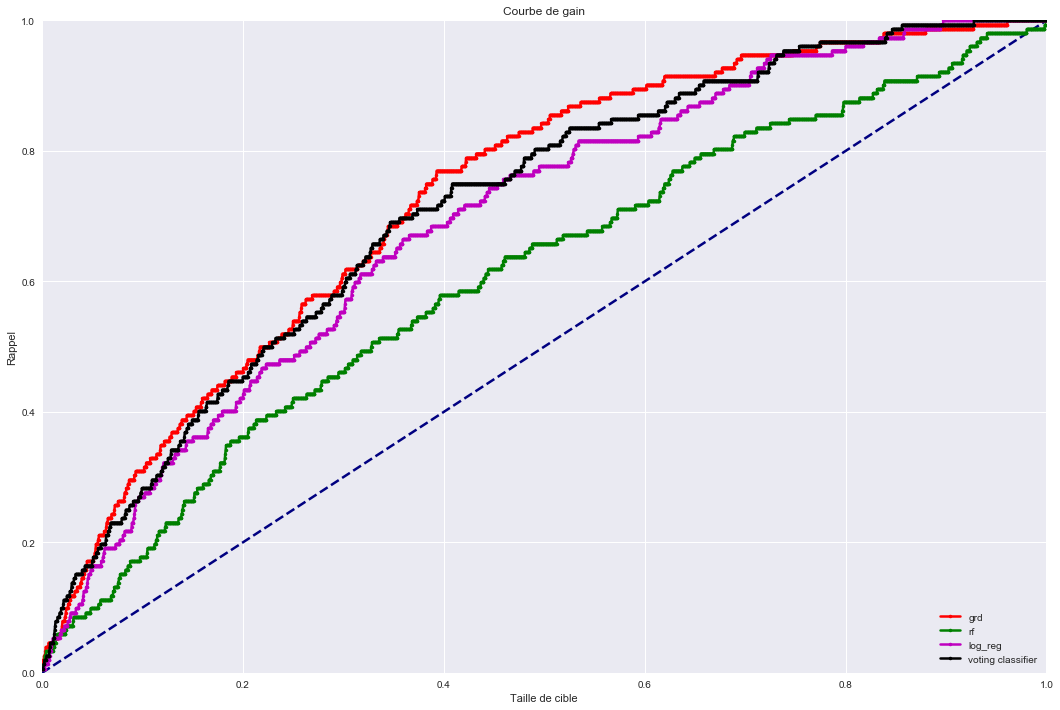

In [119]:
#graphical representation 
#title and axis labels 


a,b=get_rappel_taille(grd1)
c,d=get_rappel_taille(rf_gs1)
e,f=get_rappel_taille(log_r)
g,h=get_rappel_taille(clf_voting)
plt.figure(figsize=(18,12))
lw = 2.5

plt.title('Courbe de gain') 
plt.xlabel('Taille de cible')
plt.ylabel('Rappel')
#limits in horizontal and vertical axes
plt.xlim(0,1)
plt.ylim(0,1)
#tricks to represent the diagonal
#plt.scatter(taille,taille,marker='.',color='blue')
#gains curve 
#plt.scatter(taille,rappel,marker='.',color='red')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.plot(a,b,marker='.',color='red',lw=lw, label='grd')
plt.plot(c,d,marker='.',color='green',lw=lw, label='rf')
plt.plot(e,f,marker='.',color='m',lw=lw, label='log_reg')
plt.plot(g,h,marker='.',color='black',lw=lw, label='voting classifier')
plt.legend(loc="lower right")

#show the chart 
plt.show()


__The x-coordinate of the chart shows the percentage of the cumulative number of sorted data records according to the decreasing score value.__<br>
__The y-coordinate shows the percentage of the number of records that actually contain the selected target field value for the appropriate amount of records on the x-coordinate. __<br>
__All models are by far better than random guess but the gradient boosting classifier is the best.__

### Scoring : <a href='lda.html'>Clients Scoring with LDA</a>

### Scoring Evaluation:

__Contact the fewest people, get the max of positive responses.__

In [373]:
scores=pd.read_csv("scores.csv",sep=';')
scores2=pd.read_csv("scores2.csv",sep=';')

scores.head()

,score,SD30,SD31,SD35,SD36,SD18,SD10,SD37,SD32,SD38,...,SD22,SD42,SD33,SD39,SD14,PO47,PO61,PO59,PO44,CLASS
0,"-0,472159744240268",1,8,8,1,6,5,3,8,3,...,2,3,1,3,1,0,0,4,1,0
1,"2,05142466666919",3,6,7,2,0,5,1,9,1,...,4,6,0,5,4,6,0,4,2,1
2,"0,837691948237842",1,8,6,3,4,5,2,6,4,...,3,3,2,3,3,6,0,4,2,0
3,"0,876760524733064",3,6,7,2,4,5,2,7,5,...,5,4,2,3,4,5,0,3,2,0
4,"-0,761621250888956",9,0,9,0,9,9,5,7,4,...,2,3,2,0,6,0,0,1,2,0


In [299]:
scores = pd.concat([scores, scores2], ignore_index=True)
len(scores)

9822

In [244]:
scores['score']=scores['LD1']
scores=scores.drop(['LD1'],1)

In [374]:
scores['score'] = scores.score.apply(lambda x: str(x))
scores['score'] = scores.score.apply(lambda x: x[0:6])
scores['score'] = scores.score.apply(lambda x: x.replace(",", "."))
scores['score'] = scores.score.apply(lambda x: float(x))

In [375]:
scores.head()

,score,SD30,SD31,SD35,SD36,SD18,SD10,SD37,SD32,SD38,...,SD22,SD42,SD33,SD39,SD14,PO47,PO61,PO59,PO44,CLASS
0,-0.4720,1,8,8,1,6,5,3,8,3,...,2,3,1,3,1,0,0,4,1,0
1,2.0514,3,6,7,2,0,5,1,9,1,...,4,6,0,5,4,6,0,4,2,1
2,0.8376,1,8,6,3,4,5,2,6,4,...,3,3,2,3,3,6,0,4,2,0
3,0.8767,3,6,7,2,4,5,2,7,5,...,5,4,2,3,4,5,0,3,2,0
4,-0.7610,9,0,9,0,9,9,5,7,4,...,2,3,2,0,6,0,0,1,2,0


In [376]:
scoreClass=[]
for e in scores.score:
    if(e>1.5):
        scoreClass.append(1)
    else:
        scoreClass.append(0)
scores['scoreClass']=scoreClass
scores.head()

,score,SD30,SD31,SD35,SD36,SD18,SD10,SD37,SD32,SD38,...,SD42,SD33,SD39,SD14,PO47,PO61,PO59,PO44,CLASS,scoreClass
0,-0.4720,1,8,8,1,6,5,3,8,3,...,3,1,3,1,0,0,4,1,0,0
1,2.0514,3,6,7,2,0,5,1,9,1,...,6,0,5,4,6,0,4,2,1,1
2,0.8376,1,8,6,3,4,5,2,6,4,...,3,2,3,3,6,0,4,2,0,0
3,0.8767,3,6,7,2,4,5,2,7,5,...,4,2,3,4,5,0,3,2,0,0
4,-0.7610,9,0,9,0,9,9,5,7,4,...,3,2,0,6,0,0,1,2,0,0


__The threshold used is 1.5, it was extracted graphicaly from the lda plot and will be confirmed to be accurate in the following.__

In [377]:
yes = scores.loc[scores['scoreClass'] == 1]
no = scores.loc[scores['scoreClass'] == 0]
yesyes = yes.loc[yes['CLASS'] == 1]
allyes=scores.loc[scores['CLASS'] == 1]
yesno = no.loc[no['CLASS'] == 1]
print('')
print("- Proportion of clients that have minimum score of 1.5 : ",round(len(yes)/len(scores),3))
print('')
print("-",round(len(yesyes)/len(yes),2)*100,"% of clients that have minimum score of 1.5 are actualy intersted in the product")
print('')

print("- Targeting only ",round(100*len(yes)/len(scores),2),'% of the clients we can select',
      round(len(yesyes)/len(allyes),2)*100 , "% of all interested clients")


- Proportion of clients that have minimum score of 1.5 :  0.062

- 21.0 % of clients that have minimum score of 1.5 are actualy intersted in the product

- Targeting only  6.25 % of the clients we can select 22.0 % of all interested clients


__These results are very satisfying since we can target only a small fraction of the clients: 6% and select 27% of all potenitial interested ones __<br>
__This can be of a huge help to the insurance company since it will save them money and prevent them from disturbing uninterested customers__.

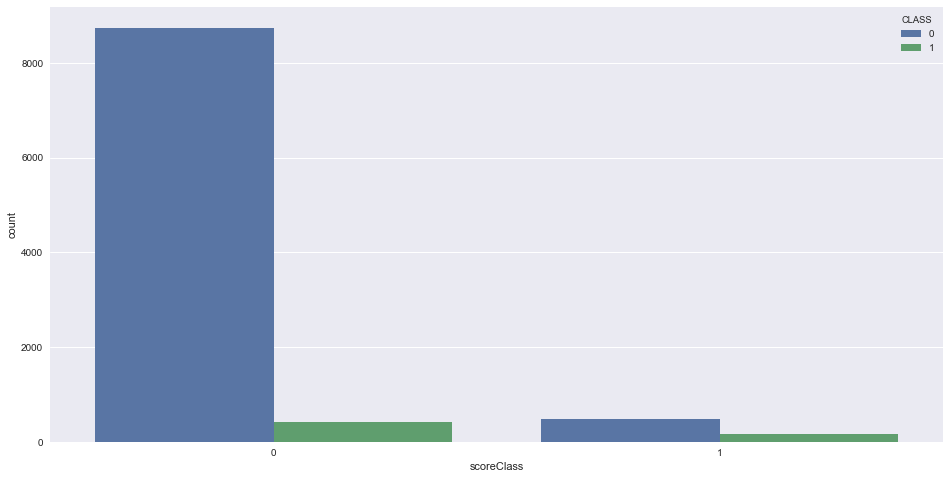

In [340]:
fig = plt.figure(figsize=(16,8))
ax = sns.countplot(x='scoreClass',hue='CLASS',data=scores)

__These variables are the ones identifyed to be the most important by LDA and the ones that have the most variance among the two classes.__

In [291]:
scores.columns

Index(['score', 'SD30', 'SD31', 'SD35', 'SD36', 'SD18', 'SD10', 'SD37', 'SD32',
       'SD38', 'SD12', 'SD22', 'SD42', 'SD33', 'SD39', 'SD14', 'PO47', 'PO61',
       'PO59', 'PO44', 'CLASS', 'scoreClass'],
      dtype='object')

#  Social-Demographic Target Customer Profile :

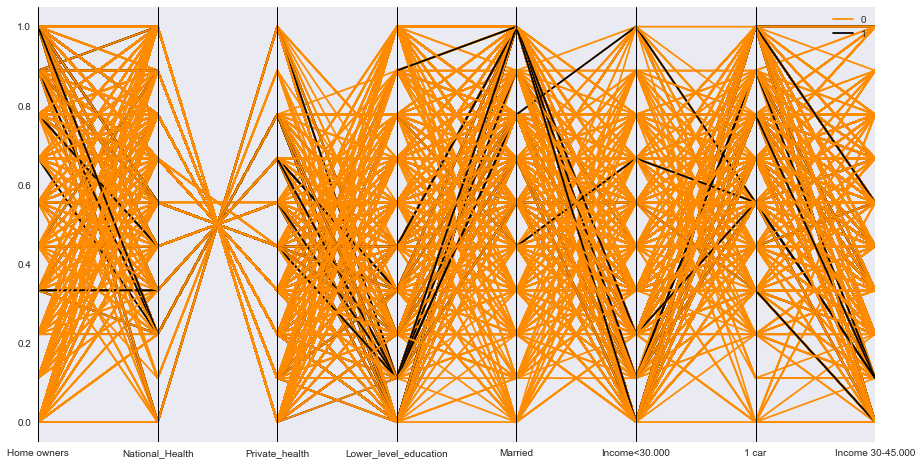

In [292]:
from pandas.plotting import parallel_coordinates

x = scores.loc[:,'SD31':'SD38']
x.columns=[ 'Home owners','National_Health','Private_health',
           'Lower_level_education','Married','Income<30.000','1 car','Income 30-45.000']
#delta['cluster']=cluster_labels
y=scores["scoreClass"]

X_norm = (x - x.min())/(x.max() - x.min())
# Select features to include in the plot
plot_feat = ['Home owners','National_Health','Private_health',
           'Lower_level_education','Married','Income<30.000','1 car','Income 30-45.000']
# Concat classes with the normalized data
data_norm = pd.concat([X_norm[plot_feat], y], axis=1)
plt.figure(figsize=(15,8))
# Perform parallel coordinate plot
parallel_coordinates(data_norm, 'scoreClass',color=['darkorange','black'])
plt.show()

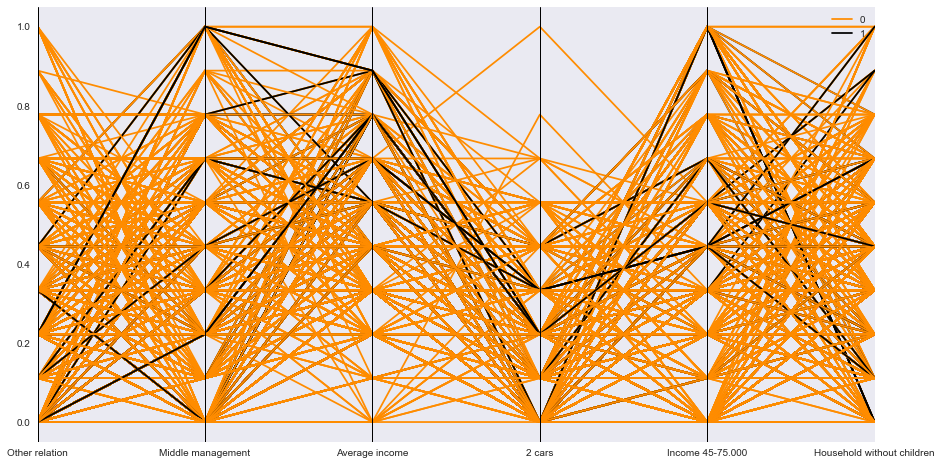

In [293]:

x = scores.loc[:,'SD12':'SD14']
x.columns=[ 'Other relation','Middle management','Average income',
           '2 cars','Income 45-75.000','Household without children']
#delta['cluster']=cluster_labels
y=scores["scoreClass"]

X_norm = (x - x.min())/(x.max() - x.min())
# Select features to include in the plot
plot_feat = ['Other relation','Middle management','Average income',
           '2 cars','Income 45-75.000','Household without children']
# Concat classes with the normalized data
data_norm = pd.concat([X_norm[plot_feat], y], axis=1)
plt.figure(figsize=(15,8))
# Perform parallel coordinate plot
parallel_coordinates(data_norm, 'scoreClass',color=['darkorange','black'])
plt.show()

__Profiles that are interested in the caravan insurance have these social demographic caracteritics:__<br>
- __Tend to be home owners__
- __Have private health insurance__
- __Have a decent education level __
- __Are married__
- __Have above average income: the upper medium class__
- __Have a car which is expected__
- __Tend to be middle managments__

# Product Related Target Customer Profile :

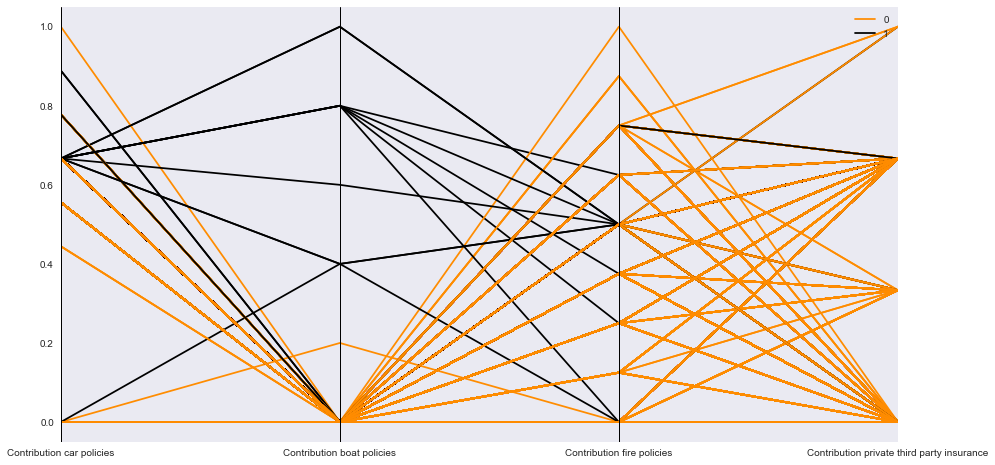

In [294]:
x = scores.loc[:,'PO47':'PO44']
x.columns=[ 'Contribution car policies','Contribution boat policies',
           'Contribution fire policies','Contribution private third party insurance']
#delta['cluster']=cluster_labels
y=scores["scoreClass"]

X_norm = (x - x.min())/(x.max() - x.min())
# Select features to include in the plot
plot_feat = ['Contribution car policies','Contribution boat policies',
             'Contribution fire policies','Contribution private third party insurance']
# Concat classes with the normalized data
data_norm = pd.concat([X_norm[plot_feat], y], axis=1)
plt.figure(figsize=(15,8))
# Perform parallel coordinate plot
parallel_coordinates(data_norm, 'scoreClass',color=['darkorange','black'])
plt.show()

__Profiles that are interested in the caravan insurance have these product related caracteritics:__<br>
- __Tend to have a high contrivution to car policies__
- __Tend to have a high contrivution to boat policies__
- __Tend to have a high contrivution to fire policies__
- __Tend to have a high contrivution to private third party insurance__

# End notes :

__- We delivered diffrent models that maximize the auc score which means are accurate the most in identifying positive potentiel clients but with each model there is a different cost: the rate of misclassifying the other class.So deciding which model to use is up to the company marketng service. __<br><br>
__- All these models can be optimized by investing more time in fine tuning their paramaters or in choosing the best ratio of resampling. __